### Steps:

1.   Importing modules, Reading the data
2.   Analyzing Numerical Features
    *   Checking Statistical summary
    *   Missing Value Handling
    *   Correcting datatype
    *   Extracting new features and drop redundant ones
    *   Checking Distribution of numerical features
    *   Univaritate and Bivariate Analysis
    *   Inspecting Correlation
    *   Data Visualization
    *   Outlier Treatment
3.  Analyzing Categorical Features
    *   Missing Value Handling
    *   Encoding Categorical Features
    *   Data Visualization
    *   Dropping Redundant Features
4.  Splitting data into Train and Test data
    *   Transformation of Target Variable
    *   Imputing Missing Values
    *   Feature Scaling
5.  Ridge Regression
6.  Lasso Regression
9.  Model Evaluation 
10. Choosing the final model and most significant features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# opening the csv file:
data=pd.read_csv('/Users/rishismac/Downloads/train.csv')
data=data.set_index('Id')
data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

## Understanding the data:

In [3]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## Checking missing data and imputing:

In [4]:
# Checking the percentage of missing data columnwise:
feature_dict=(data.isna().sum()/len(data)*100)
feature_df=pd.DataFrame(feature_dict,columns=['NA_Percentage'])
na_features=list(feature_df[feature_df['NA_Percentage']>0].index)
feature_df[feature_df['NA_Percentage']>0]

NA_Percentage
LotFrontage       17.739726
Alley             93.767123
MasVnrType        59.726027
MasVnrArea         0.547945
BsmtQual           2.534247
BsmtCond           2.534247
BsmtExposure       2.602740
BsmtFinType1       2.534247
BsmtFinType2       2.602740
Electrical         0.068493
FireplaceQu       47.260274
GarageType         5.547945
GarageYrBlt        5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
PoolQC            99.520548
Fence             80.753425
MiscFeature       96.301370

In [5]:
# List of features having missing data:
na_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Data Imputation:
- Refering to the data dictionary it is evident that most of the missing data refers to the absence of that feature
- All the missing data has been filled with 'No <feature_name>'

In [6]:

data['Alley'].fillna('No Alley',inplace=True)
data['Alley'].value_counts()

Alley
No Alley    1369
Grvl          50
Pave          41
Name: count, dtype: int64

In [7]:
data['MasVnrType'].fillna('No Masonry',inplace=True)
data['MasVnrType'].value_counts()

MasVnrType
No Masonry    872
BrkFace       445
Stone         128
BrkCmn         15
Name: count, dtype: int64

In [8]:
data['BsmtQual'].fillna('No Basement',inplace=True)
data['BsmtQual'].value_counts()

BsmtQual
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: count, dtype: int64

In [9]:
data['BsmtCond'].fillna('No Basement',inplace=True)
data['BsmtCond'].value_counts()


BsmtCond
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: count, dtype: int64

In [10]:
data['BsmtExposure'].fillna('No Basement',inplace=True)
data['BsmtExposure'].value_counts()

BsmtExposure
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: count, dtype: int64

In [11]:
data['BsmtFinType1'].fillna('No Basement',inplace=True)
data['BsmtFinType1'].value_counts()

BsmtFinType1
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: count, dtype: int64

In [12]:
data['BsmtFinType2'].fillna('No Basement',inplace=True)
data['BsmtFinType2'].value_counts()

BsmtFinType2
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: count, dtype: int64

In [13]:
data['FireplaceQu'].fillna('No Fireplace',inplace=True)
data['FireplaceQu'].value_counts()

FireplaceQu
No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: count, dtype: int64

In [14]:
data['GarageType'].fillna('No Garage',inplace=True)
data['GarageType'].value_counts()

GarageType
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: count, dtype: int64

In [15]:
# Filling missing garage year built with 0:
data['GarageYrBlt'].fillna('0',inplace=True)
data['GarageYrBlt'].value_counts()

GarageYrBlt
0         81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 98, dtype: int64

In [16]:
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageFinish'].value_counts()

GarageFinish
Unf          605
RFn          422
Fin          352
No Garage     81
Name: count, dtype: int64

In [17]:
data['GarageQual'].fillna('No Garage',inplace=True)
data['GarageQual'].value_counts()


GarageQual
TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: count, dtype: int64

In [18]:
data['GarageCond'].fillna('No Garage',inplace=True)
data['GarageCond'].value_counts()


GarageCond
TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: count, dtype: int64

In [19]:
data['PoolQC'].fillna('No Pool',inplace=True)
data['PoolQC'].value_counts()


PoolQC
No Pool    1453
Gd            3
Ex            2
Fa            2
Name: count, dtype: int64

In [20]:
data['Fence'].fillna('No Fence',inplace=True)
data['Fence'].value_counts()

Fence
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: count, dtype: int64

In [21]:
data['MiscFeature'].fillna('None',inplace=True)
data['MiscFeature'].value_counts()

MiscFeature
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [22]:
# Checking the missing values again:
feature_dict=(data.isna().sum()/len(data)*100)
feature_df=pd.DataFrame(feature_dict,columns=['NA_Percentage'])
na_features=list(feature_df[feature_df['NA_Percentage']>0].index)
feature_df[feature_df['NA_Percentage']>0]

NA_Percentage
LotFrontage      17.739726
MasVnrArea        0.547945
Electrical        0.068493

In [23]:
# checking value counts for 'MasVnrType':
data['MasVnrType'].value_counts()

MasVnrType
No Masonry    872
BrkFace       445
Stone         128
BrkCmn         15
Name: count, dtype: int64

In [24]:
# It is evident that properties having no masonry have missing values in 'MasVnrType' and 'MasVnrArea':
sub=data[['MasVnrArea','MasVnrType']]
sub[sub['MasVnrArea'].isna()]


MasVnrArea  MasVnrType
Id                          
235          NaN  No Masonry
530          NaN  No Masonry
651          NaN  No Masonry
937          NaN  No Masonry
974          NaN  No Masonry
978          NaN  No Masonry
1244         NaN  No Masonry
1279         NaN  No Masonry

In [25]:
# Imputing missing MasVnrArea with 0.0
data['MasVnrArea'].fillna(0.0,inplace=True)
data['MasVnrArea'].isna().sum()

0

In [26]:
# Dropping the rows with missing value for 'Electrical' feature as they are very low in percentage:
data.dropna(subset=['Electrical'],inplace=True)
data['Electrical'].isna().sum()

0

In [27]:
# Mapping different values of 'MSSubClass' with their meaning as per data dictionary:
data['MSSubClass']=data['MSSubClass'].map({
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [28]:
# Checking for missing data again:
feature_dict=(data.isna().sum()/len(data)*100)
feature_df=pd.DataFrame(feature_dict,columns=['NA_Percentage'])
na_features=list(feature_df[feature_df['NA_Percentage']>0].index)
feature_df[feature_df['NA_Percentage']>0]

NA_Percentage
LotFrontage      17.751885

In [29]:
#Imputing missing data of 'LotFrontage' using median value of respective clusters by grouping o basis of 'MSZoning':
data["LotFrontage"]= data.groupby("MSZoning")["LotFrontage"].transform(lambda x: x.fillna(x.mode().iloc[0]))



In [30]:
# Defining the numerical and categorical variables:
num_variables=list(data.describe().columns)
num_variables
a=set(data.columns)
b=set(data.describe().columns)
cat_variables=list(a-b)


num_variables.append('GarageYrBlt')
cat_variables.remove('GarageYrBlt')


num_variables

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'GarageYrBlt']

## Creating dummy variables for categorical variables:

In [31]:
# Creating dummy variable and concatenating with main dataframe:
dummy=pd.get_dummies(data[cat_variables],dtype=float,drop_first=True)
dummy

#concatenate:
data2=pd.concat([data,dummy],axis=1)


In [32]:
# Dropping the categorical variable columns after dummy variable creation:
data2.drop(cat_variables,axis=1,inplace=True)

In [33]:
# Having a final look at all the features and understanding their data types:
data2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1 to 1460
Data columns (total 273 columns):
 #    Column                                                            Dtype  
---   ------                                                            -----  
 0    LotFrontage                                                       float64
 1    LotArea                                                           int64  
 2    OverallQual                                                       int64  
 3    OverallCond                                                       int64  
 4    YearBuilt                                                         int64  
 5    YearRemodAdd                                                      int64  
 6    MasVnrArea                                                        float64
 7    BsmtFinSF1                                                        int64  
 8    BsmtFinSF2                                                        int64  
 9    BsmtUnfSF  

## Univariate analysis:

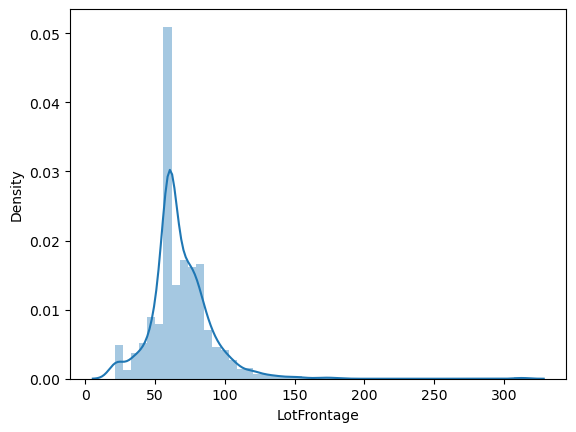

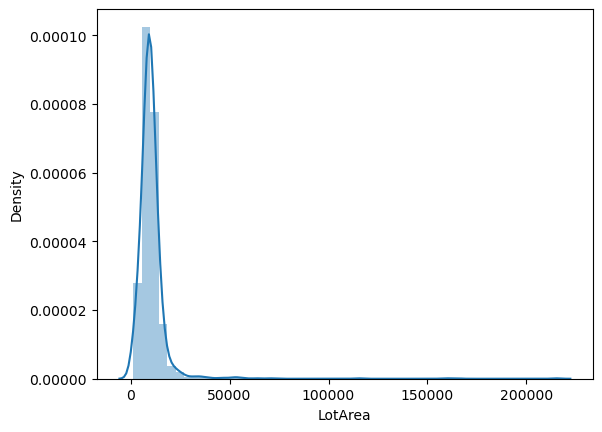

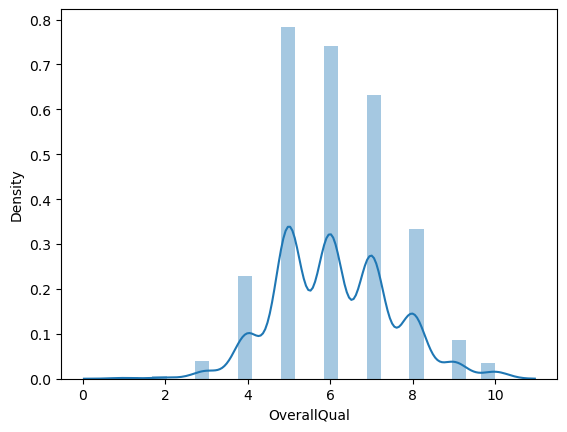

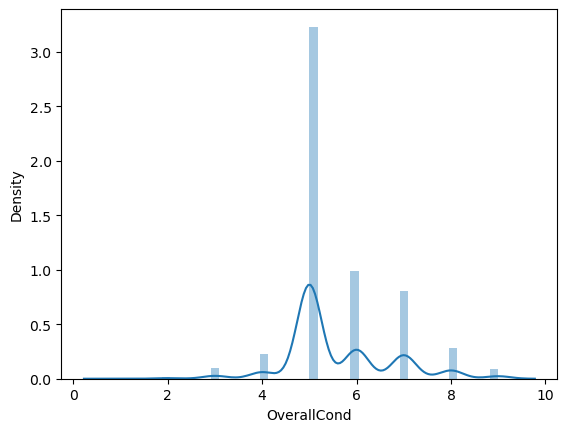

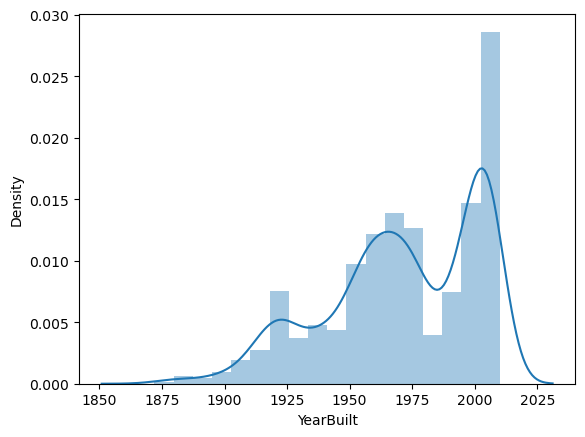

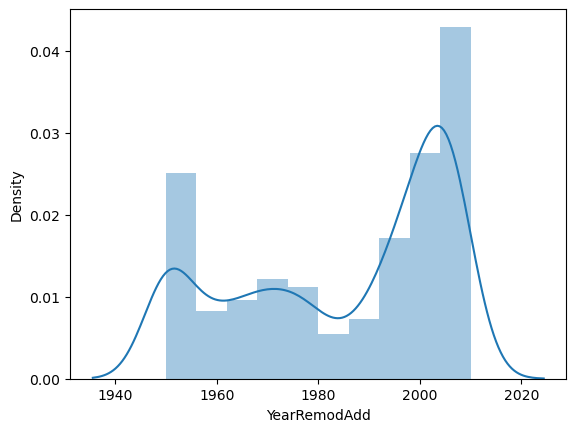

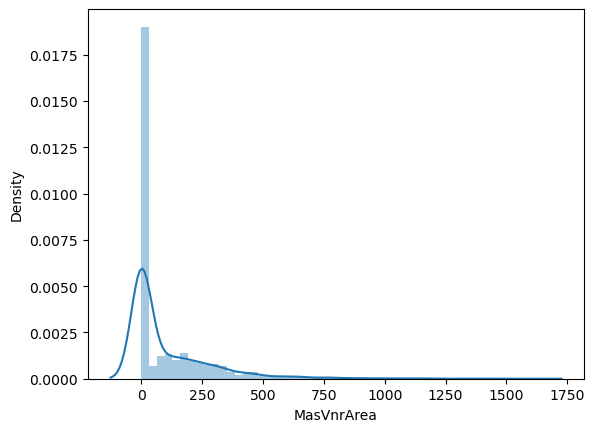

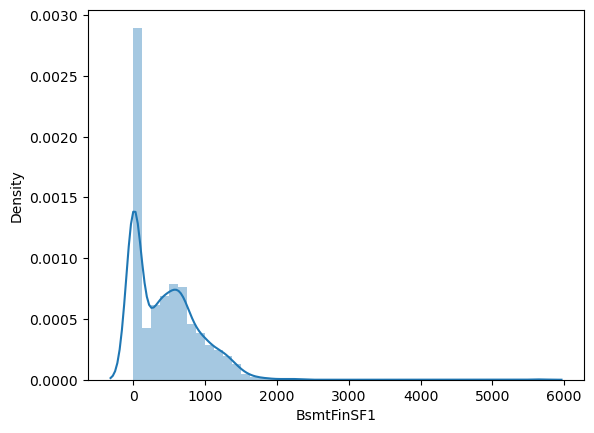

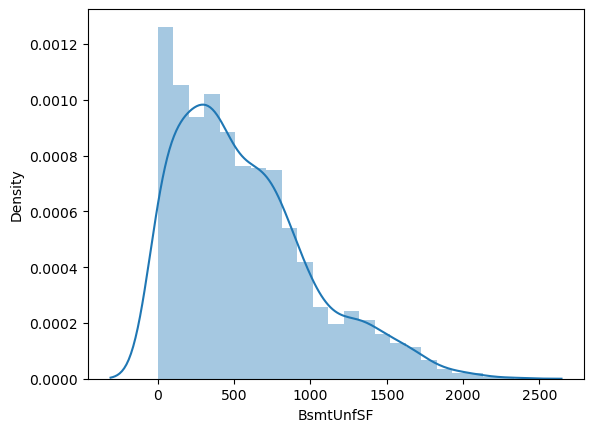

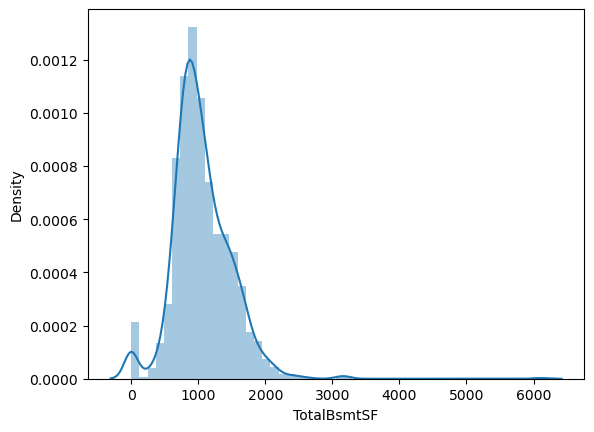

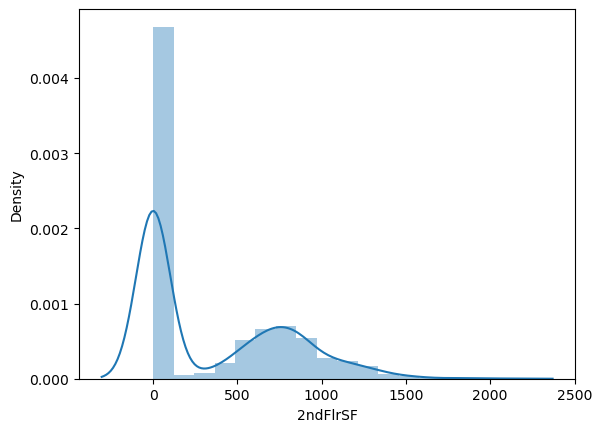

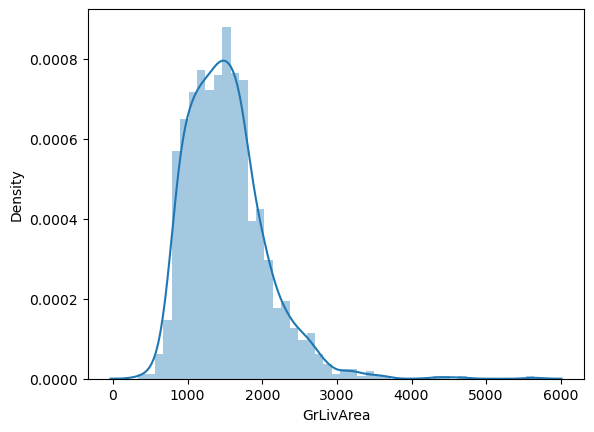

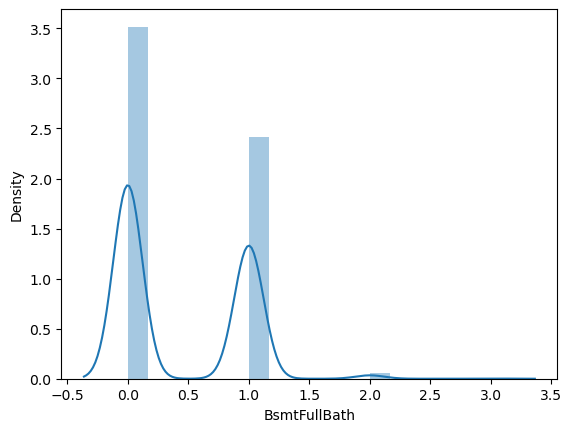

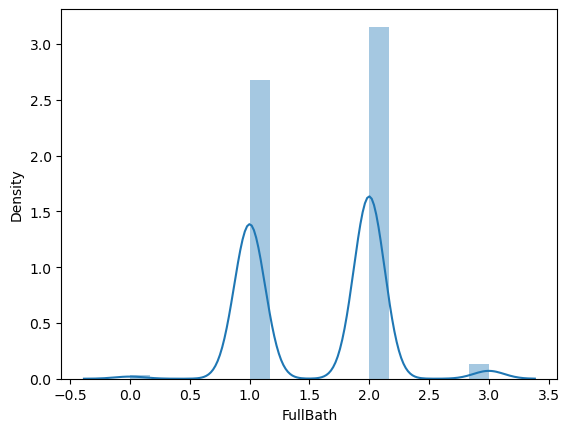

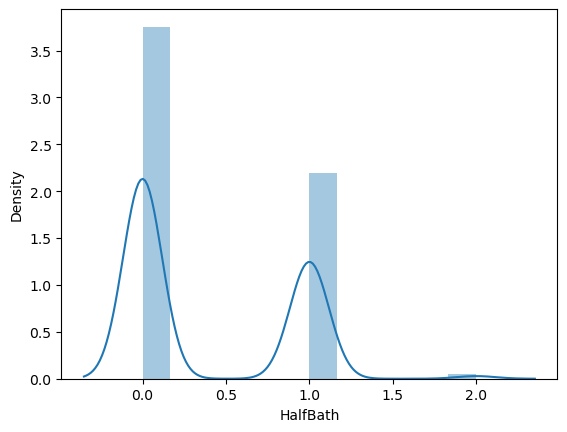

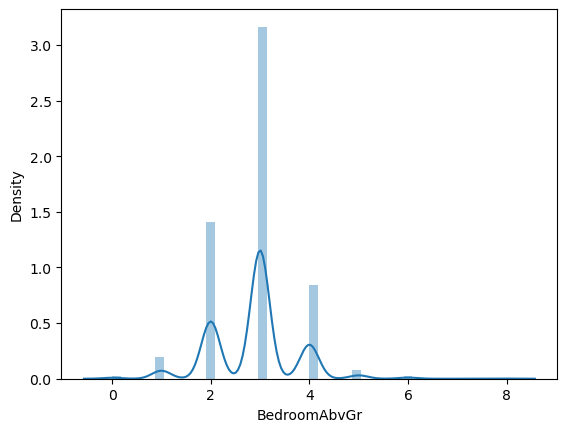

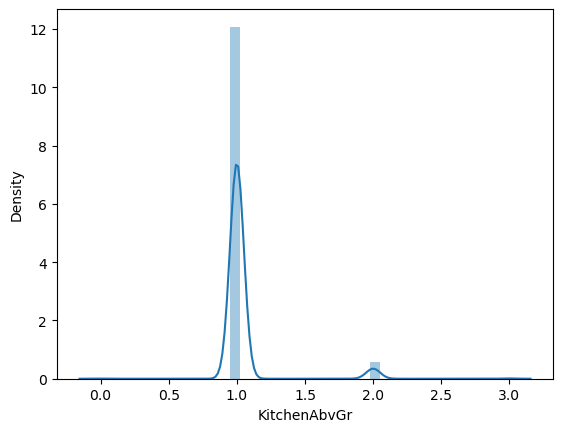

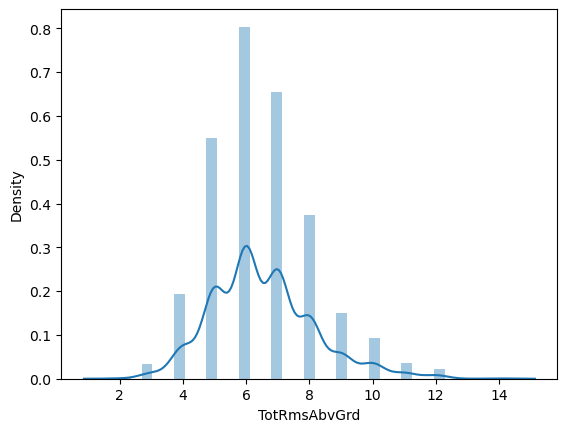

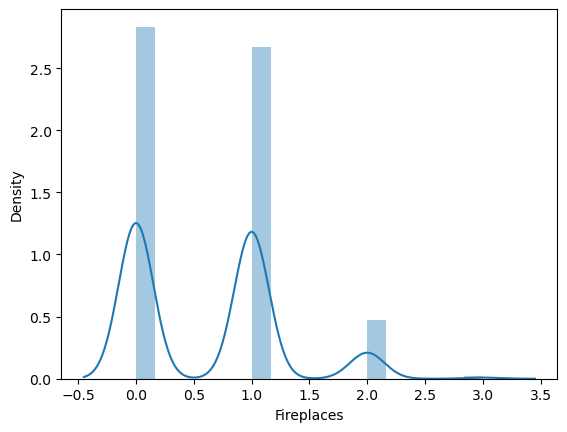

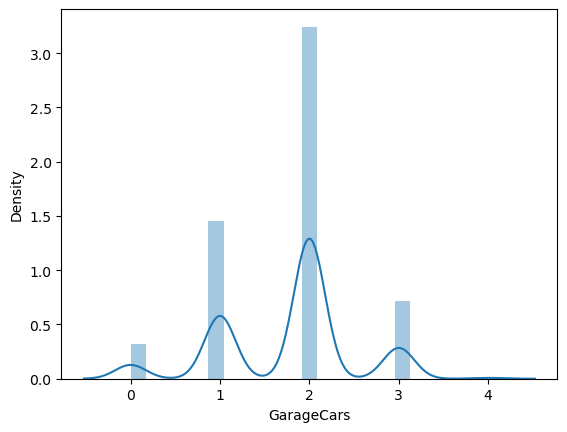

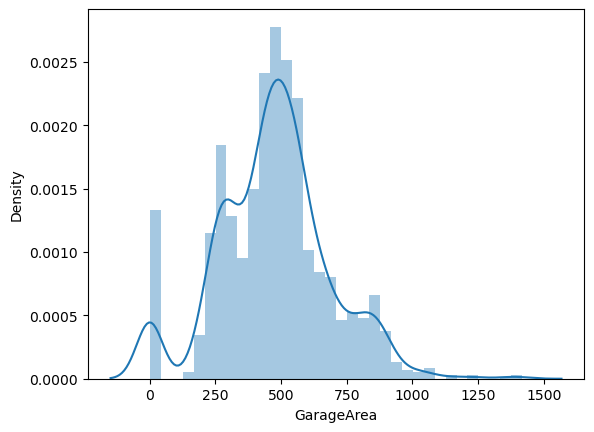

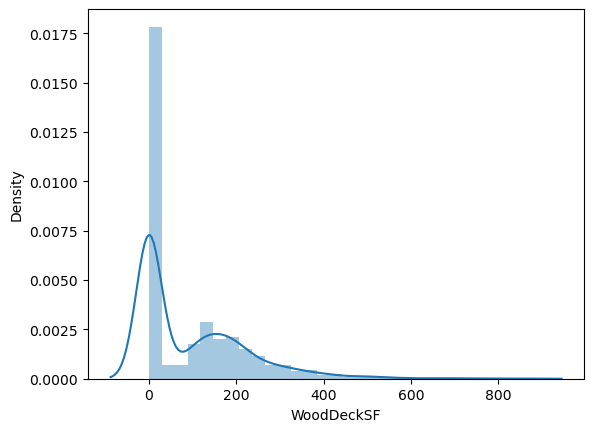

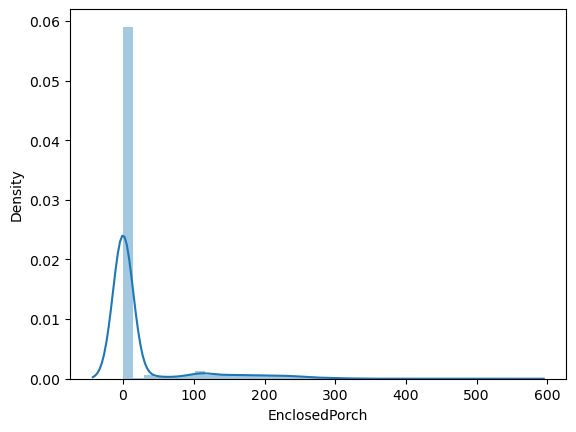

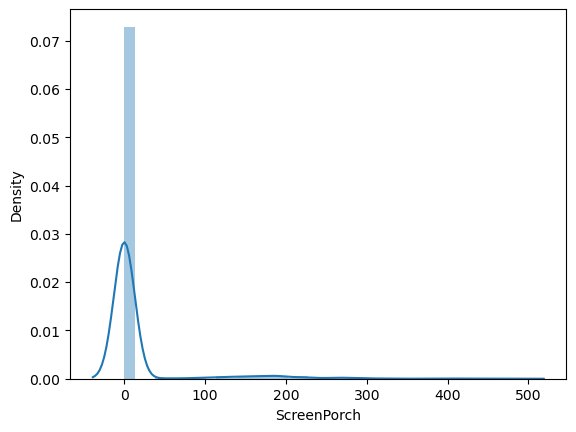

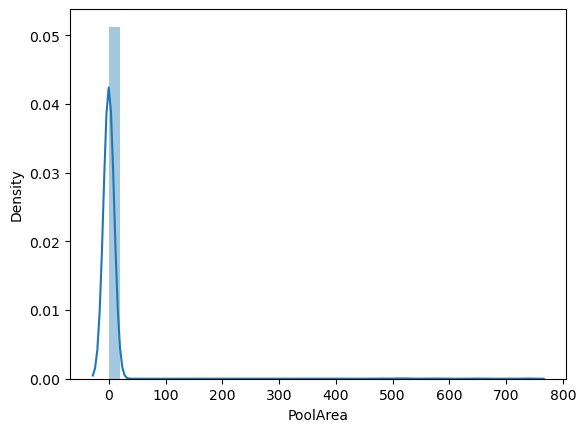

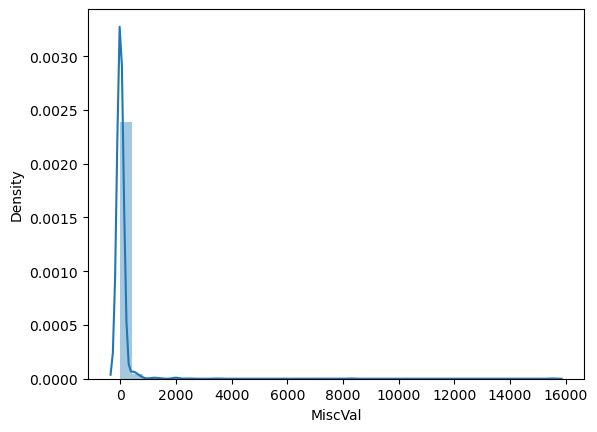

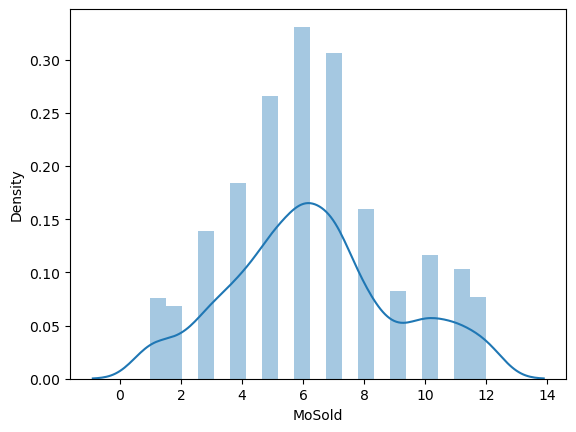

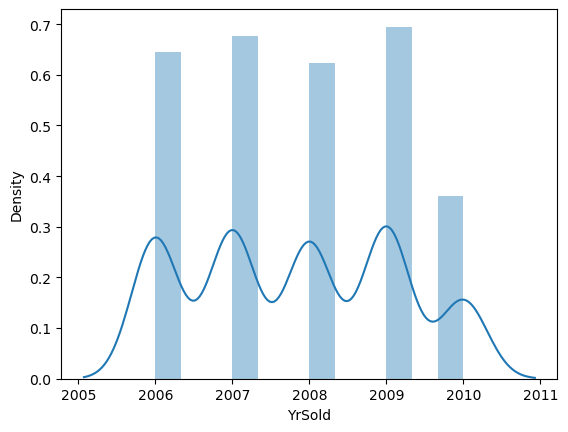

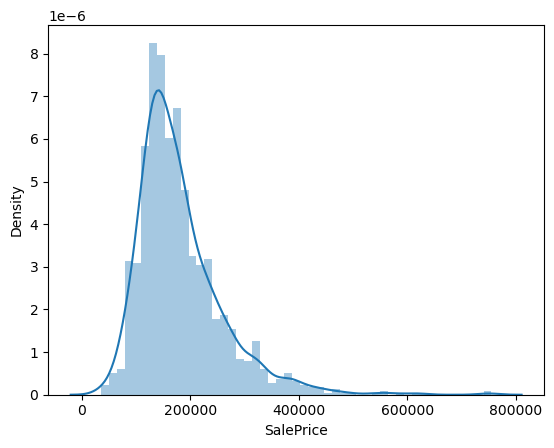

In [34]:
# checking the distribution plot for all the numerical variables to understand their distribution:
for i in num_variables:
    sns.distplot(data2[i])
    plt.show()

## From the distribution graphs it is evident that few of the features are skewed and not normally distributed, like:
- 'BsmtUnfSF is not nrmally distributed

- 'SalePrice' is right skewed
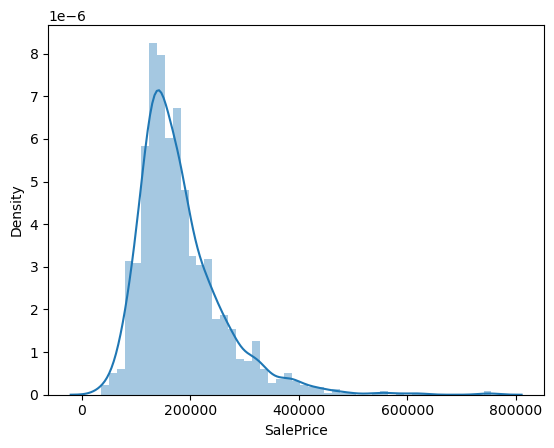

## Creation of new Bussiness driven metrics:

In [35]:
#Defining a new feature called 'PropertyAge' which is (current year - built year) and dropping the 'YearBuilt' column:
data2['PropertyAge']=data2['YearBuilt'].apply(lambda x:(2024-int(x)) )
data2=data2.drop('YearBuilt',axis=1)
# Removing the original feature from numerical variables:
num_variables.remove('YearBuilt')
# Appending the PropertyAge feature:
num_variables.append('PropertyAge')


In [36]:
# Defining a new feature as RemodelAge=current year - year modified :
data2['RemodelAge']=data2['YearRemodAdd'].apply(lambda x:(2024-int(x)))
data2=data2.drop('YearRemodAdd',axis=1)

# Removing the original feature from numerical variables:
num_variables.remove('YearRemodAdd')
# Appending the PropertyAge feature:
num_variables.append('RemodelAge')

In [37]:
# Defining a new feature as GarageAge=current year - GarageYrBlt  :
data2['GarageAge']=data2['GarageYrBlt'].apply(lambda x:(2024-int(x)))
data2=data2.drop('GarageYrBlt',axis=1)

# Removing the original feature from numerical variables:
num_variables.remove('GarageYrBlt')
# Appending the PropertyAge feature:
num_variables.append('GarageAge')

In [38]:
# Checking the data summary again:
data2.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1 to 1460
Data columns (total 273 columns):
 #    Column                                                            Dtype  
---   ------                                                            -----  
 0    LotFrontage                                                       float64
 1    LotArea                                                           int64  
 2    OverallQual                                                       int64  
 3    OverallCond                                                       int64  
 4    MasVnrArea                                                        float64
 5    BsmtFinSF1                                                        int64  
 6    BsmtFinSF2                                                        int64  
 7    BsmtUnfSF                                                         int64  
 8    TotalBsmtSF                                                       int64  
 9    1stFlrSF   

In [39]:
#Understanding the GarageAge data distribution:
data2['GarageAge'].describe()

count    1459.000000
mean      155.355038
std       453.838403
min        14.000000
25%        23.000000
50%        47.000000
75%        66.000000
max      2024.000000
Name: GarageAge, dtype: float64

### Note that in cases of properties with `No Garage` the year built was missing and imputed as `zero` and hence it appears as `2024` years in the GarageAge feature. However upon further analysis it is seen that property prices decrease as garage age increases and also properties with no garage have lesser price. Therefore cases of `No Garage` being imputed as 2024 years stays consistent with both the points and doesn't harm the trend.

## Normalizing using boxcox tranformation:

In [40]:
from scipy.stats import boxcox
for i in num_variables:
    data2[i]=data2[i].apply(lambda x:x+1)
for i in num_variables:
    if i=='SalePrice':
        continue
    data2[i]=boxcox(data2[i])[0]

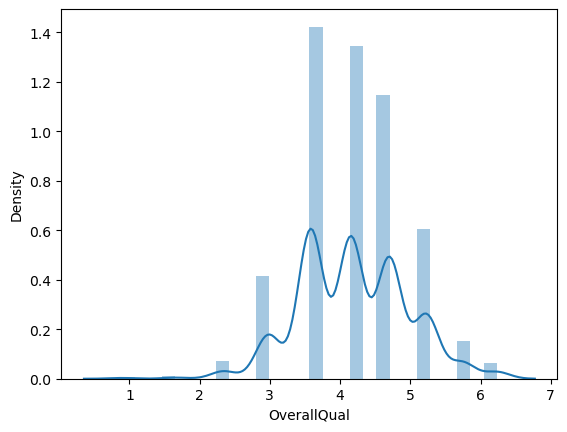

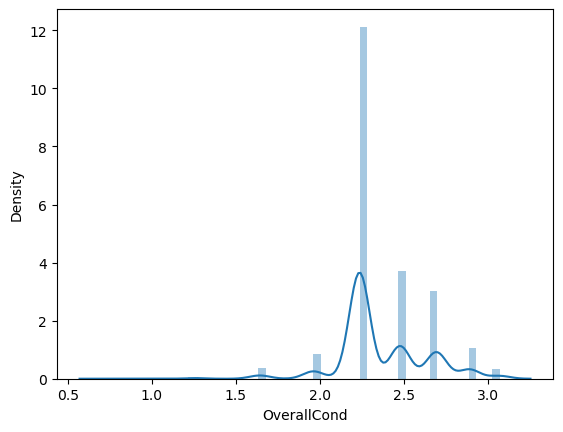

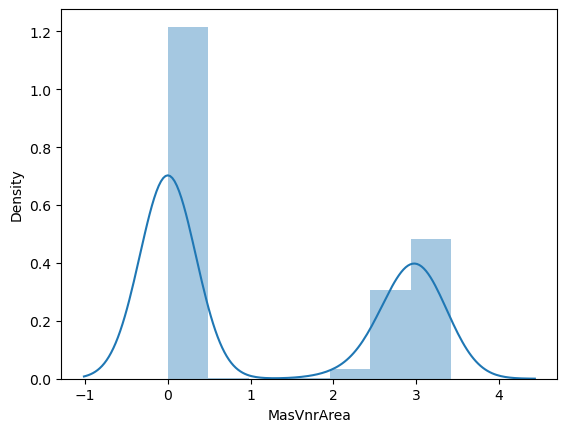

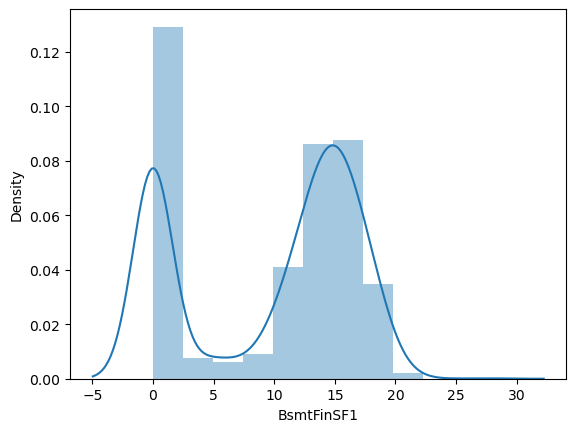

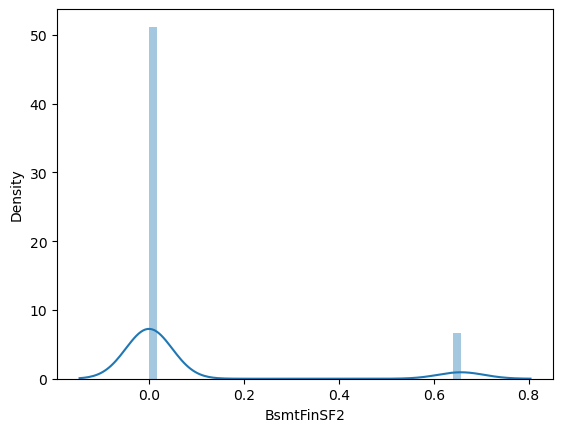

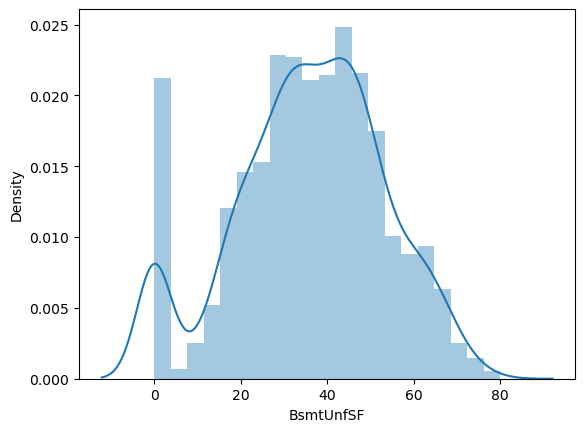

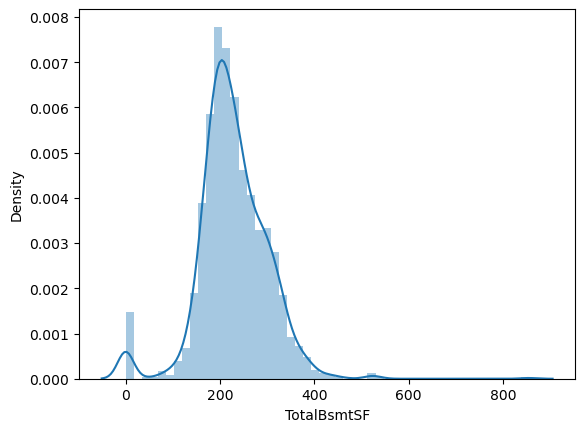

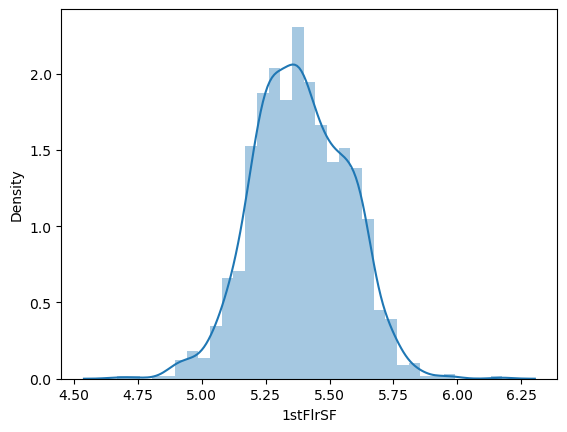

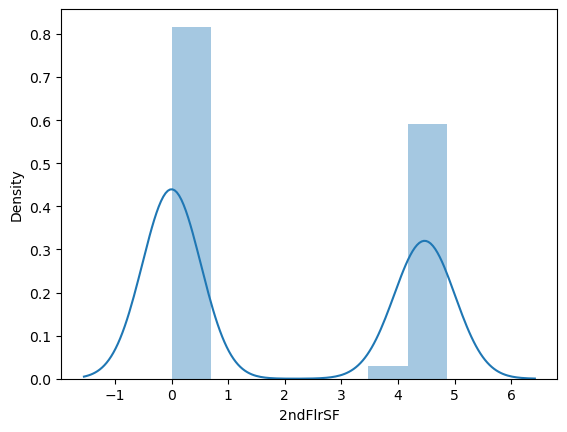

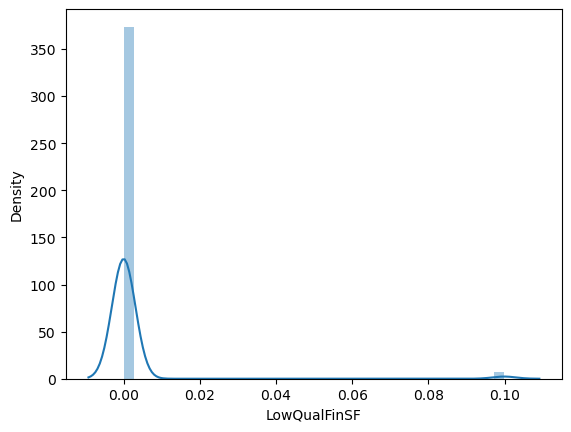

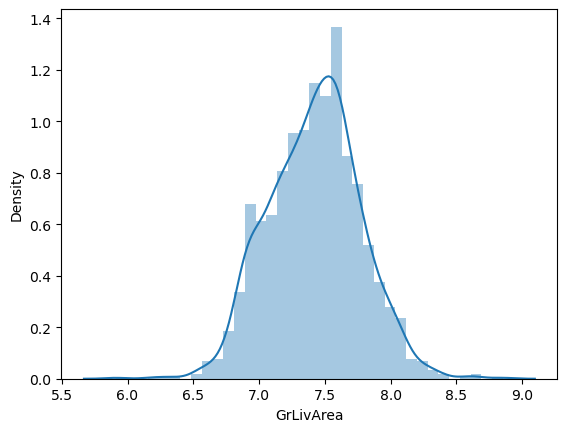

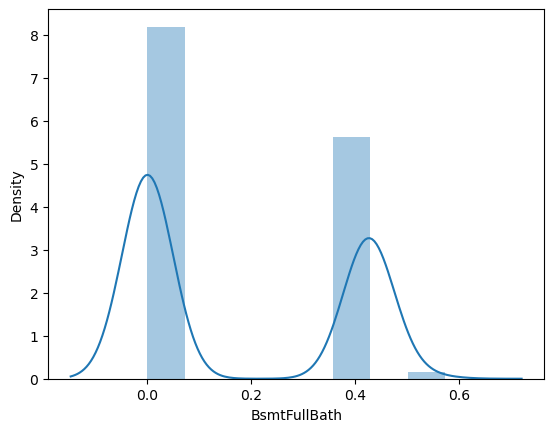

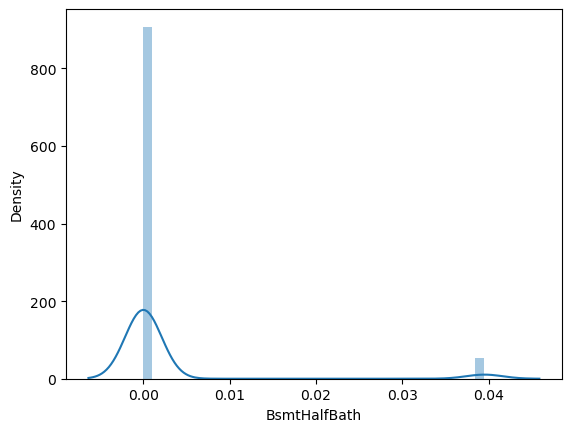

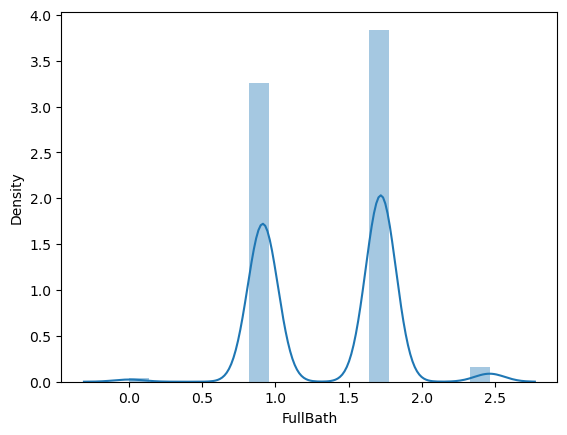

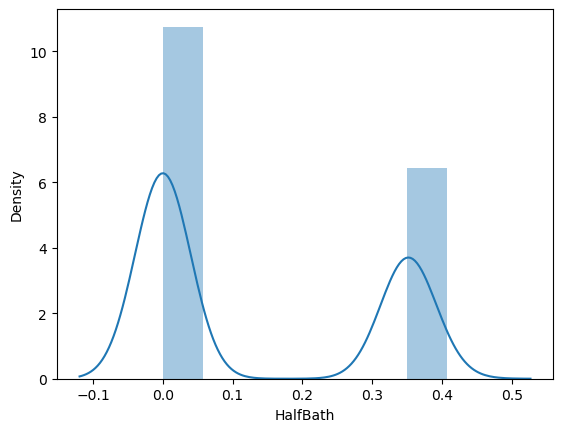

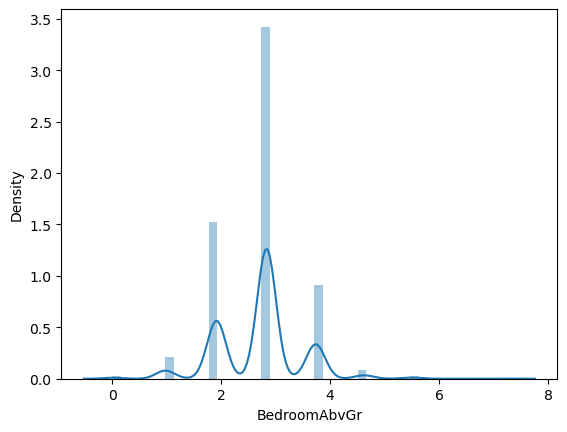

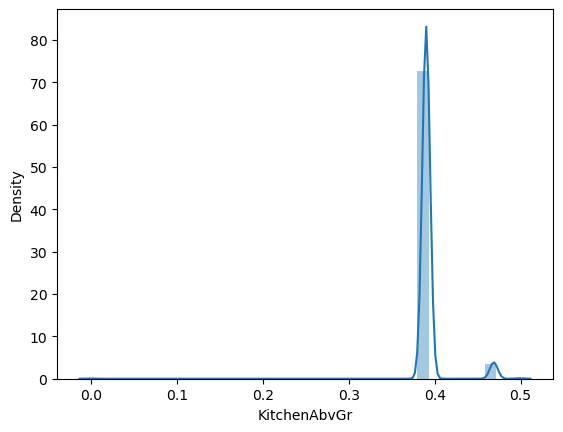

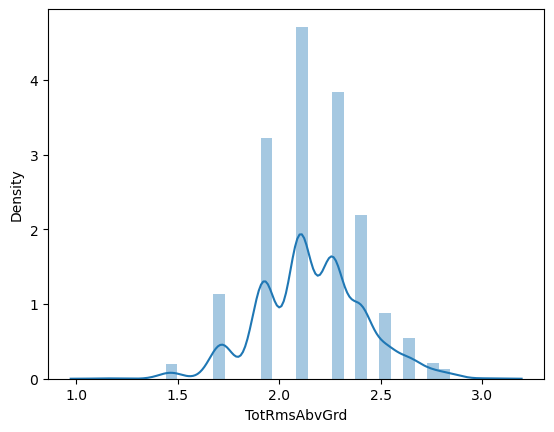

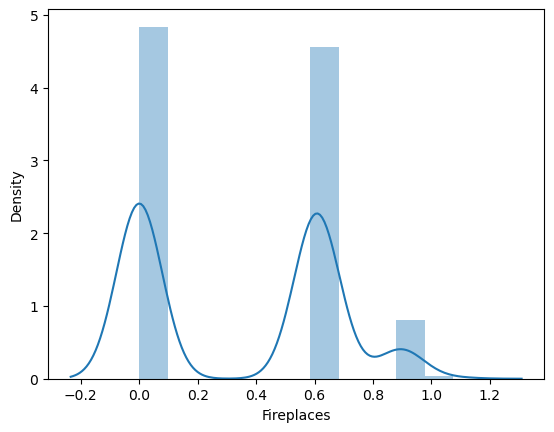

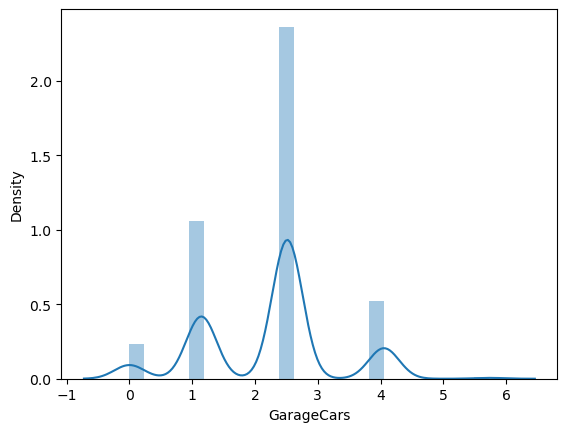

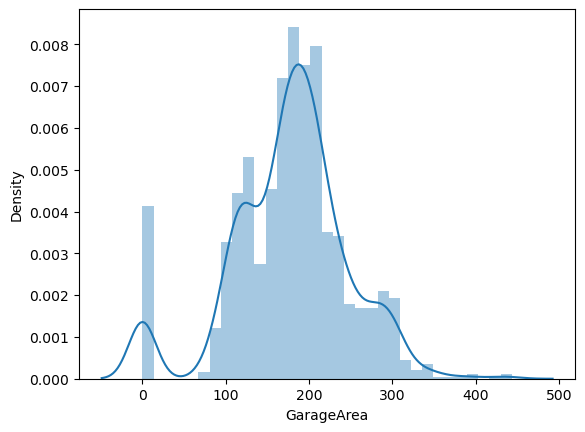

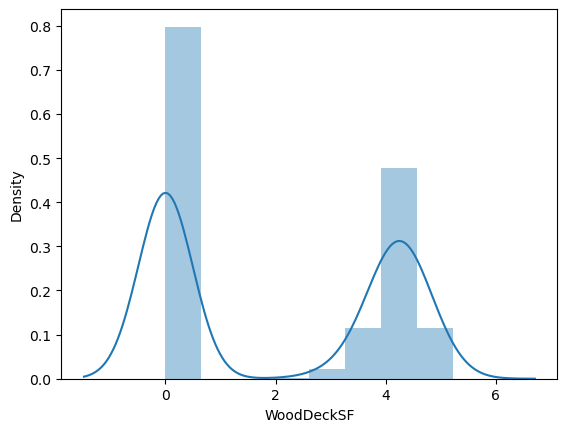

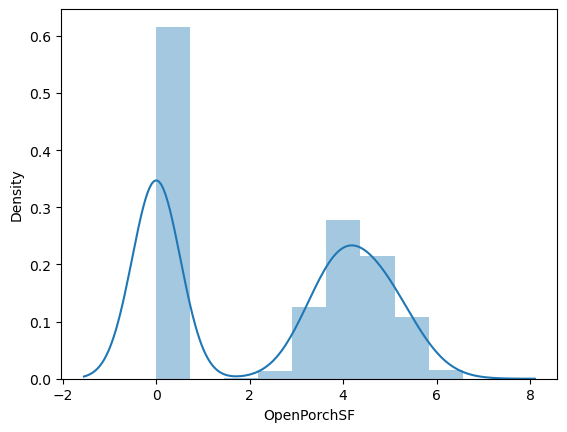

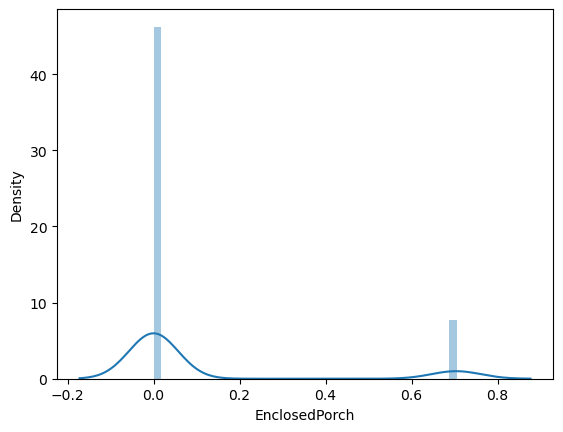

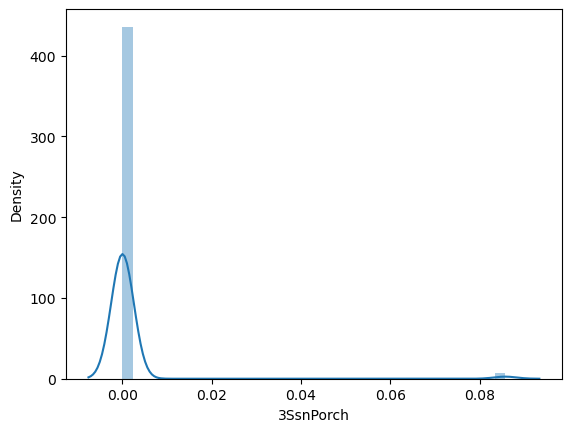

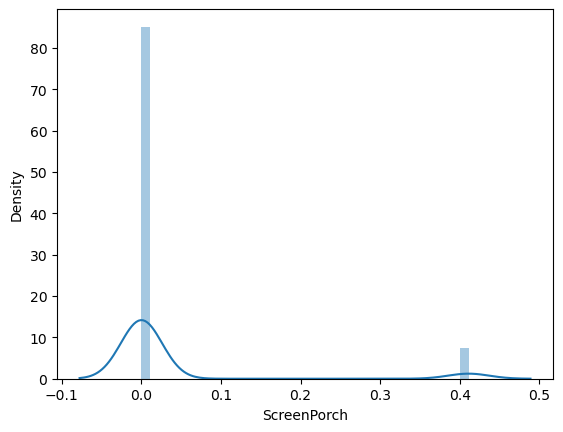

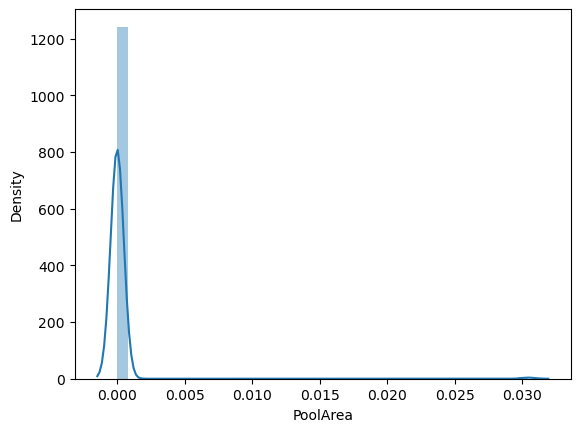

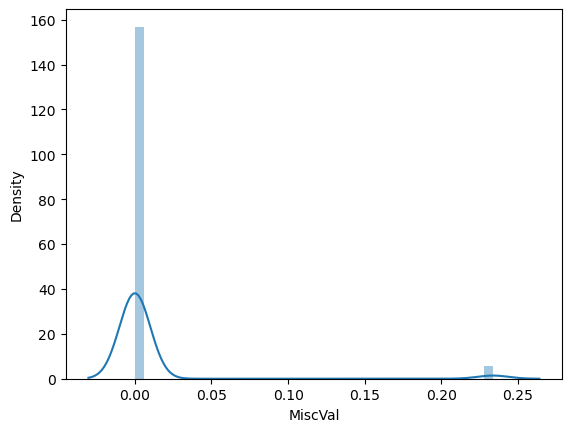

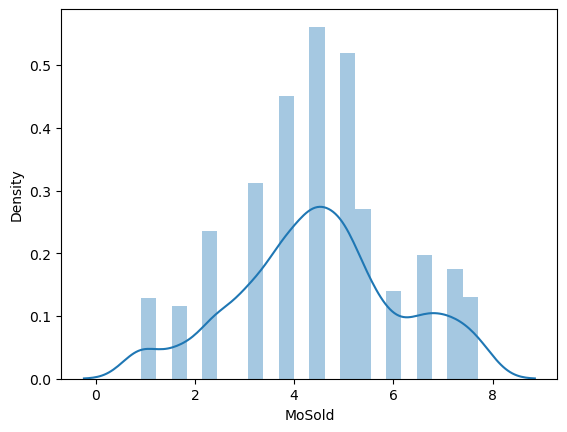

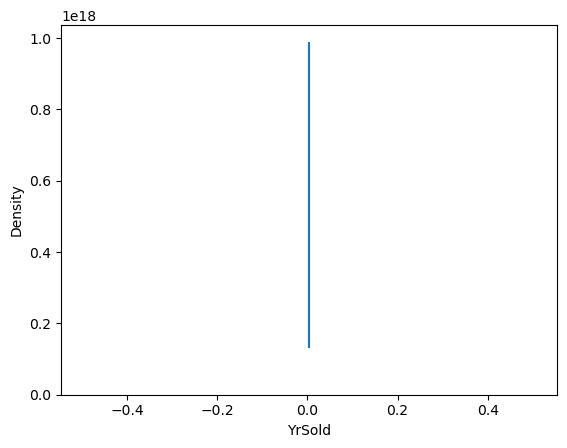

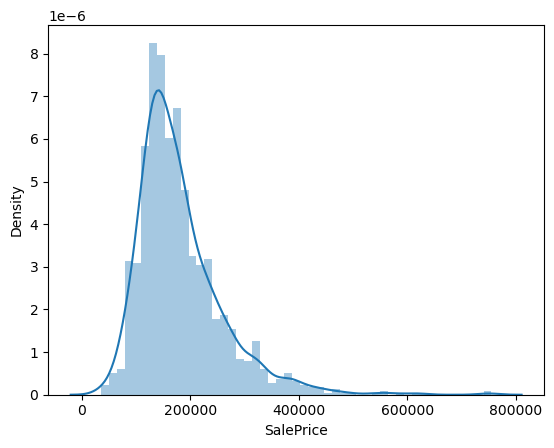

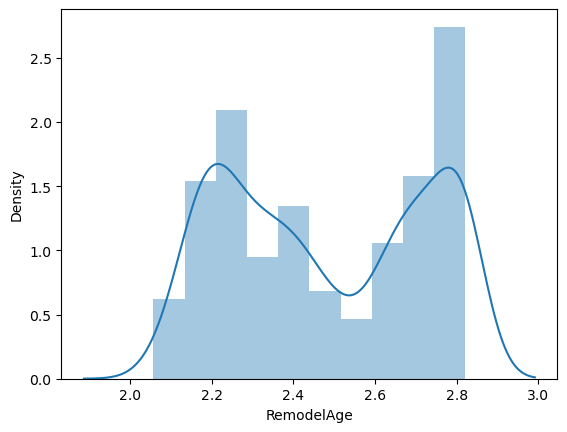

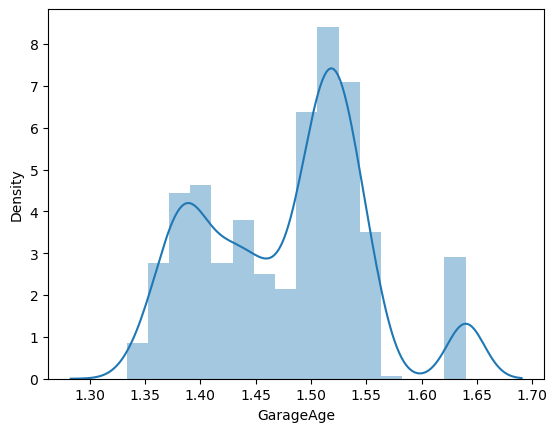

In [41]:
# Checking the data distribution of different features after normalization using boxcox transformation:
for i in num_variables:
    sns.distplot(data2[i])
    plt.show()

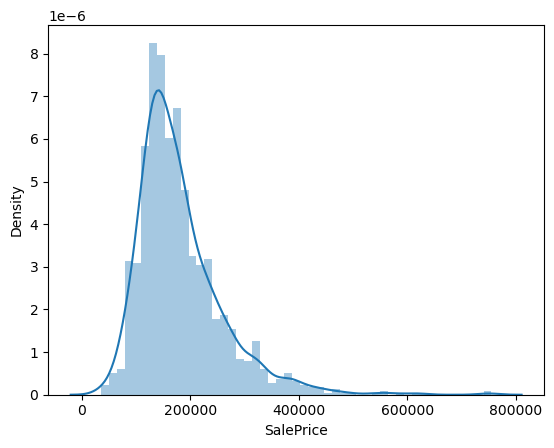

In [42]:
sns.distplot(data['SalePrice'])
plt.show()

### SalePrice data distribution is still right skewed

## Bivariate Analysis:

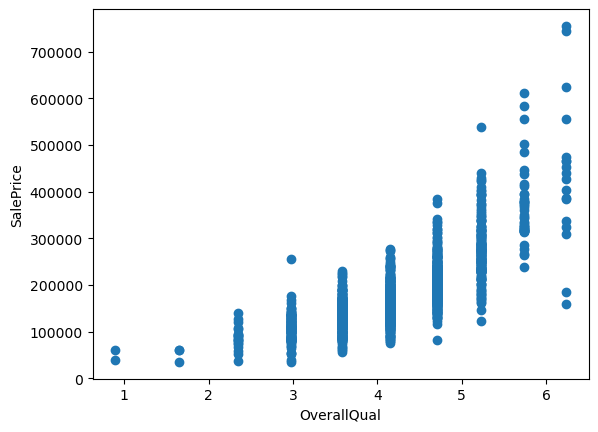

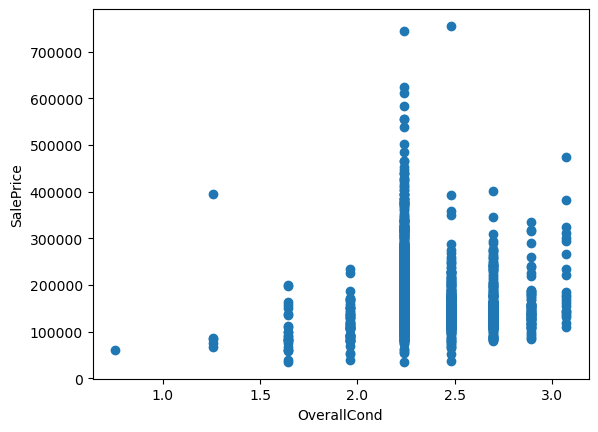

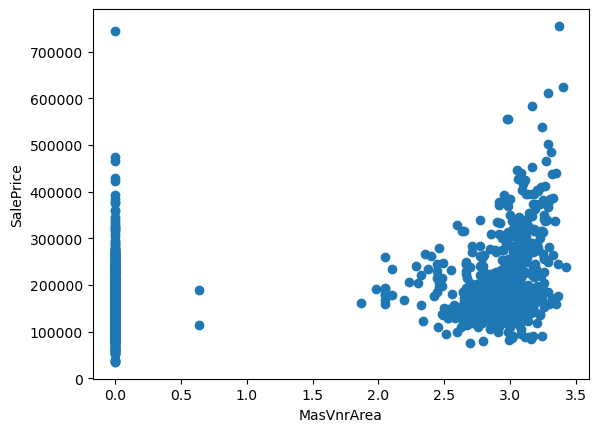

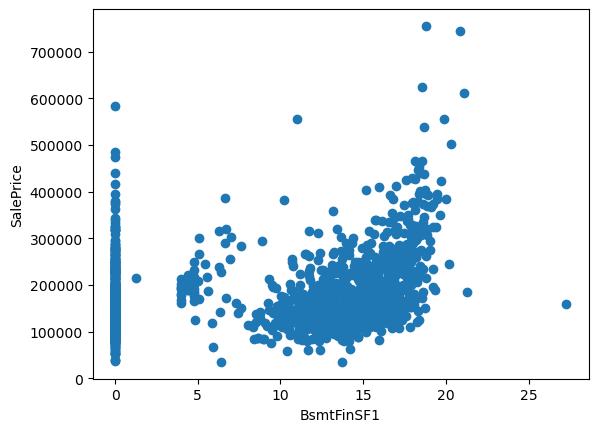

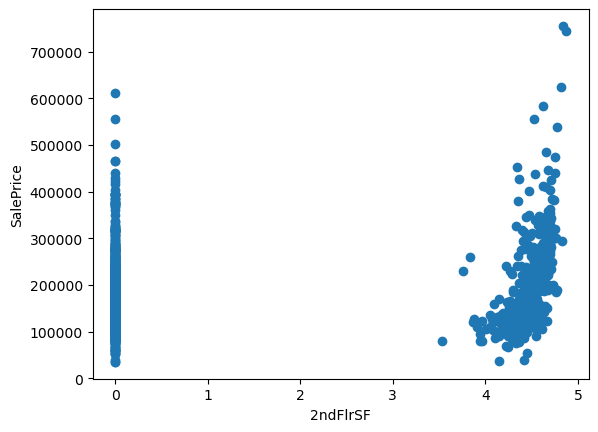

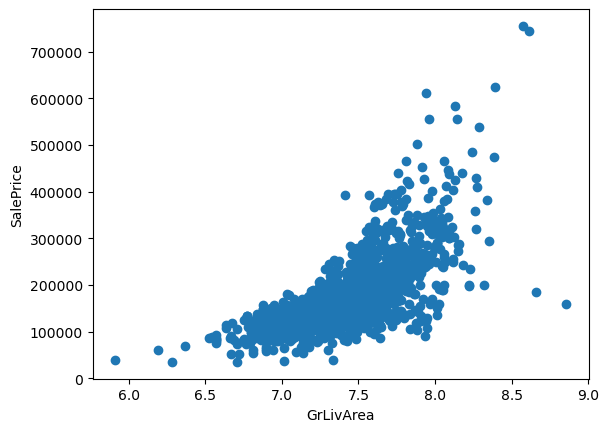

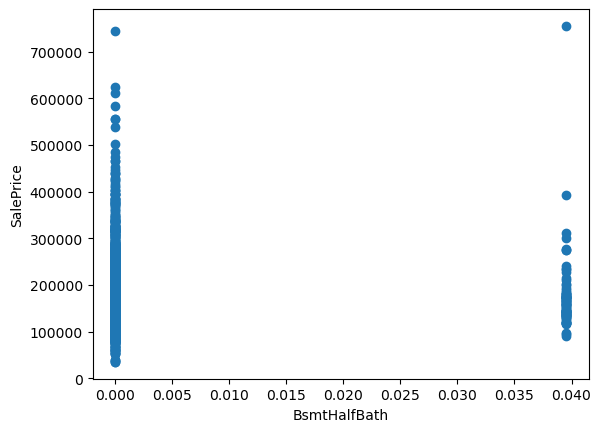

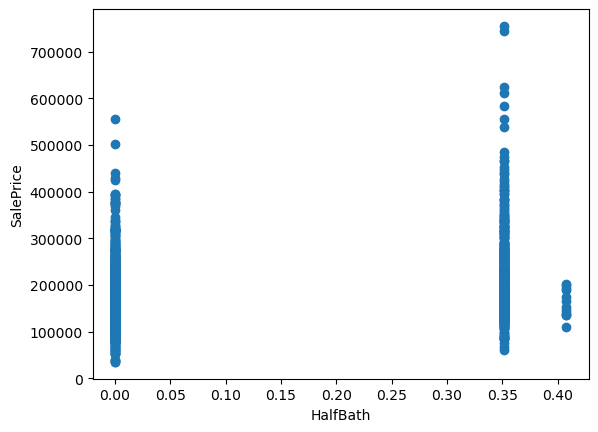

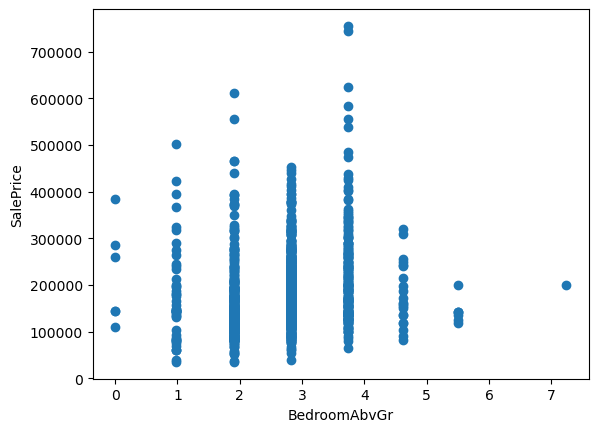

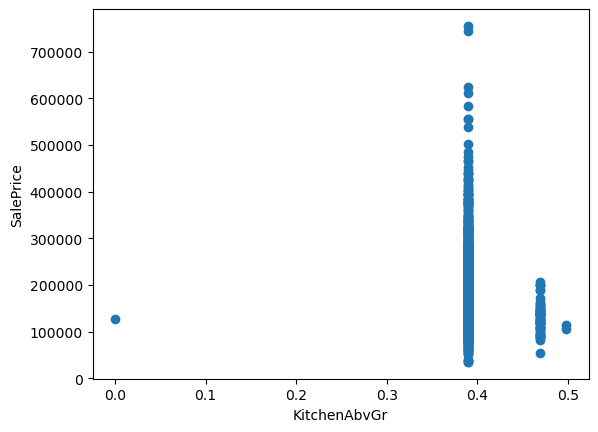

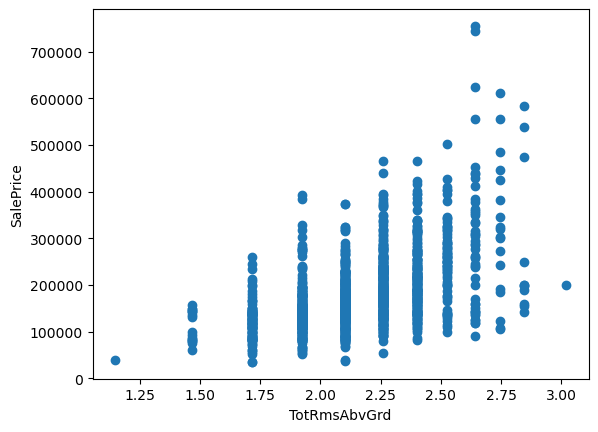

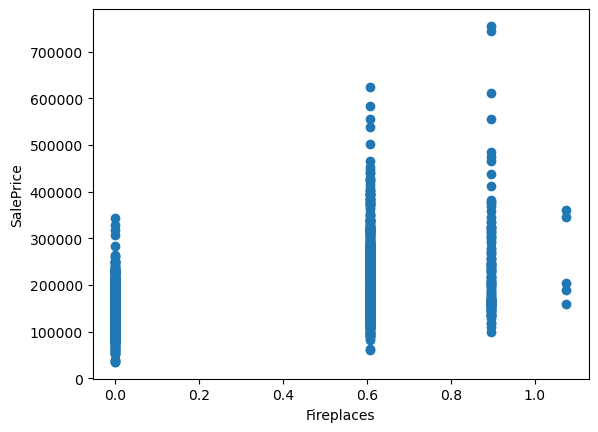

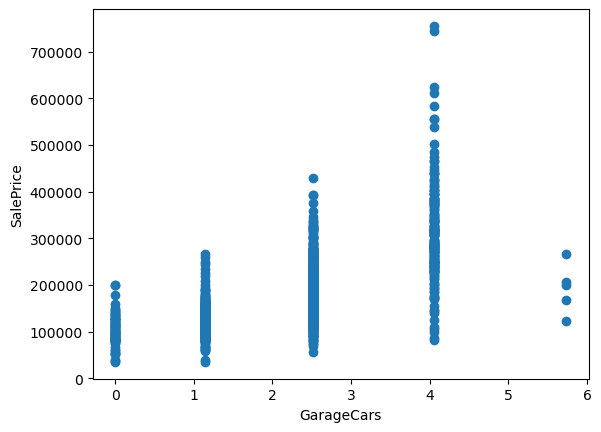

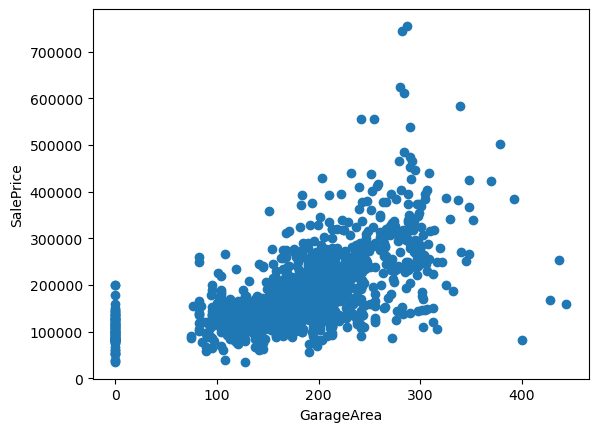

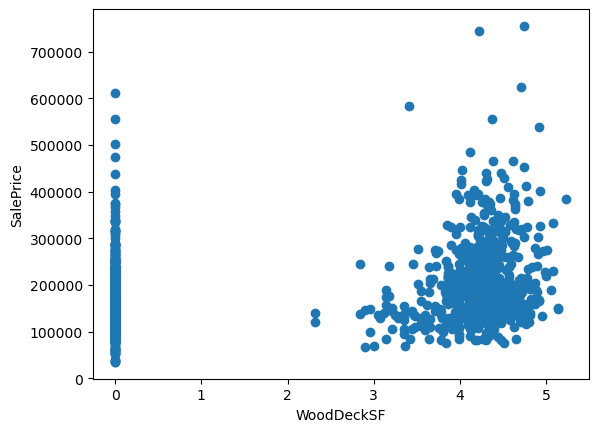

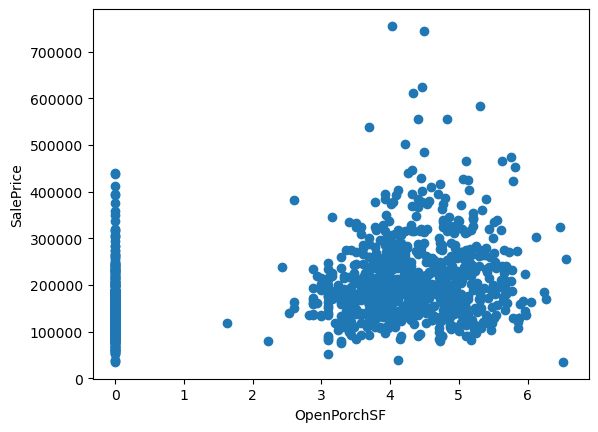

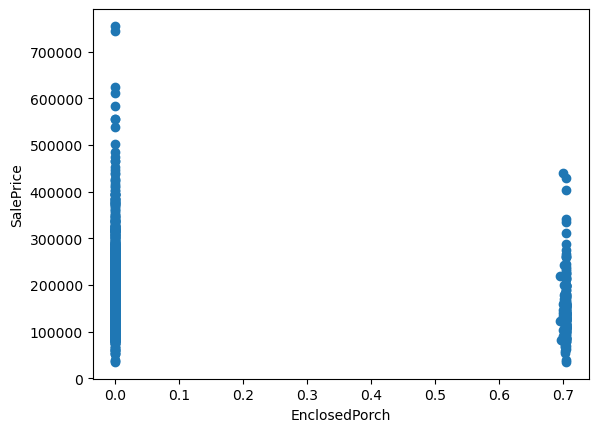

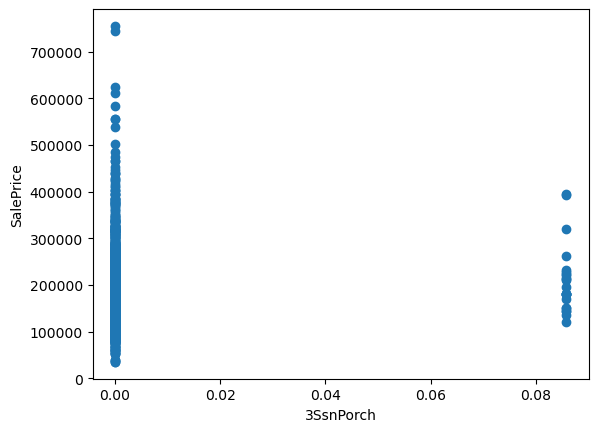

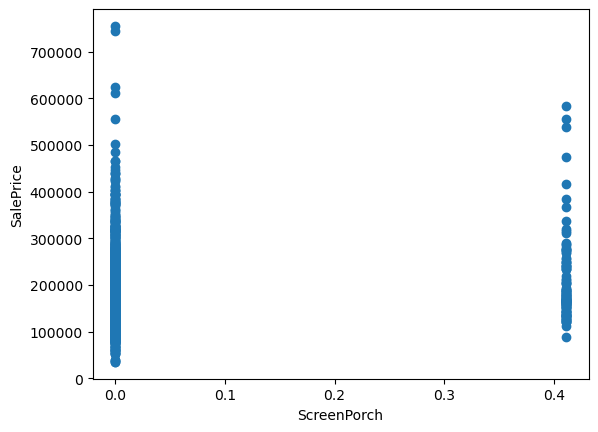

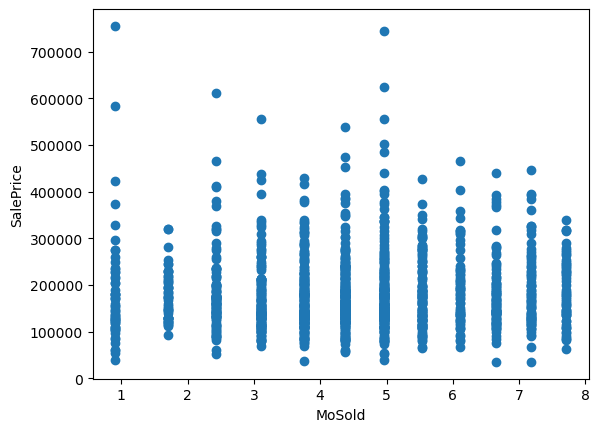

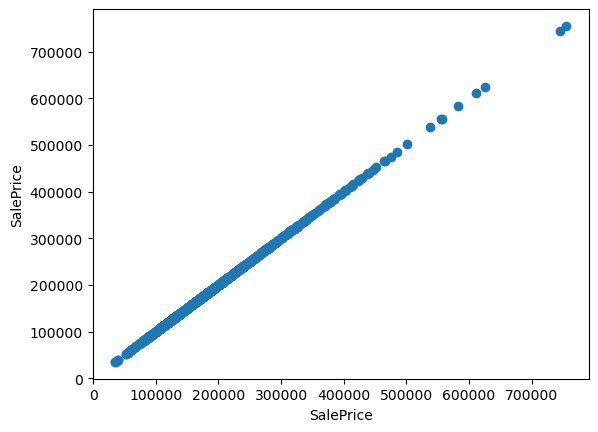

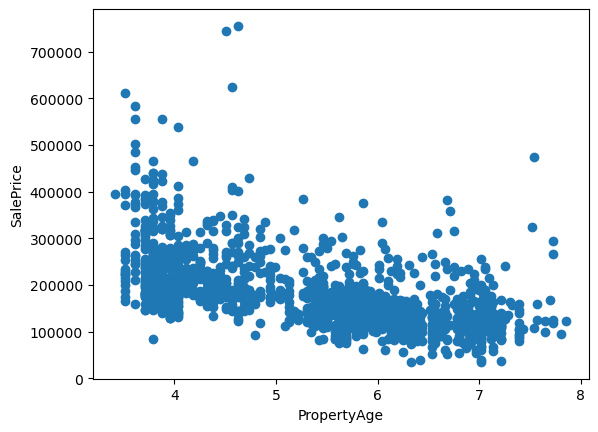

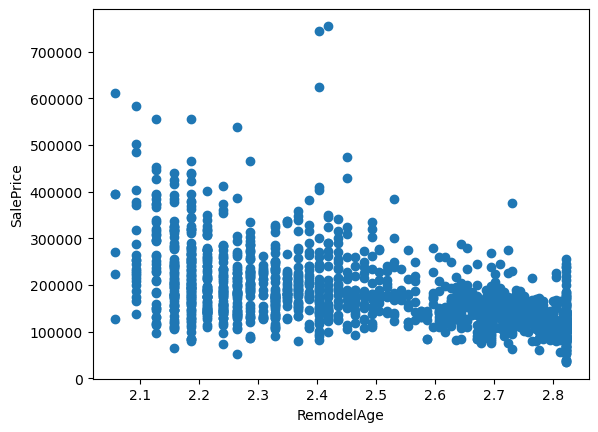

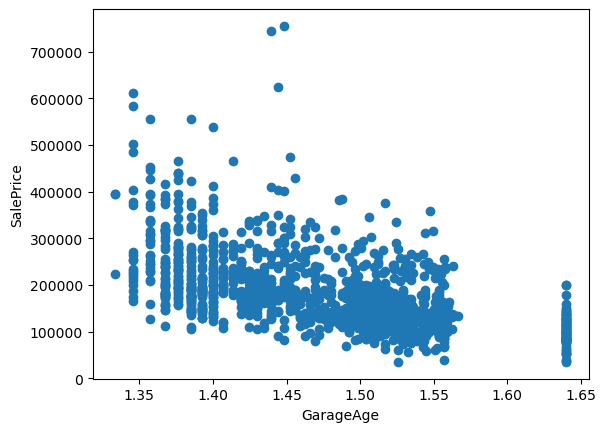

In [43]:
## Plotting SalePrice with all the Numerical variables to identify outliers that can affect the model:
for i in num_variables:
    plt.scatter(data2[i],data2['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

## Outlier handling:
- LotFrontage has a few outliers that can affect the model


In [44]:
#Checking the boxplot of LotFrontage to check the outliers:
plt.boxplot(data2['LotFrontage'])
plt.show()
values=np.array(data2['LotFrontage'])
limit=np.percentile(values,99.9)
data2['LotFrontage'].describe()

count    1459.000000
mean        8.771679
std         1.166010
min         5.231435
25%         8.416669
50%         8.593328
75%         9.450429
max        16.249000
Name: LotFrontage, dtype: float64

In [45]:
# checking for the rows with outliers:
data2[data2['LotFrontage']>limit]

LotFrontage    LotArea  OverallQual  OverallCond  MasVnrArea  \
Id                                                                   
935        16.249  12.018786     4.701684     2.694622    0.000000   
1299       16.249  13.180730     6.234385     2.237321    3.297876   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
Id                                                              ...   
935    13.122107         0.0  21.141600   149.564214  5.740741  ...   
1299   27.263903         0.0  36.303008   853.880253  6.175662  ...   

      PoolQC_Gd  PoolQC_No Pool  RoofStyle_Gable  RoofStyle_Gambrel  \
Id                                                                    
935         0.0             1.0              0.0                0.0   
1299        1.0             0.0              0.0                0.0   

      RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  PropertyAge  \
Id                                                                    
935             0.0                0.0             0.0     6.017044   
1299            1.0                0.0             0.0     3.615607   

      RemodelAge  GarageAge  
Id                           
935     2.157387   1.523238  
1299    2.126344   1.357018  

[2 rows x 273 columns]

In [46]:
#Dropping the rows with outliers:
data2=data2.drop([935,1299],axis=0)


<Axes: xlabel='SalePrice', ylabel='Density'>

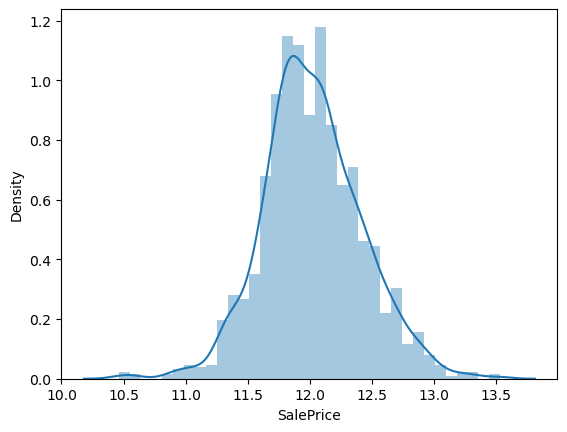

In [47]:
# Applying Logarithmic Transformation on the target variable data to Normalize the data:
data2['SalePrice']=np.log(data2['SalePrice'])
sns.distplot(data2['SalePrice'])

### It can be seen that the data is now normally distributed after applying loagarithmic transformation.

In [48]:
#plt.boxplot(data2['SalePrice'])
#plt.show()
#values=np.array(data2['SalePrice'])
#limit=np.percentile(values,95)
#data2['SalePrice'].describe()

In [49]:
#index=list(data2[data2['SalePrice']>limit]['SalePrice'].index)
#data2=data2.drop(index,axis=0)


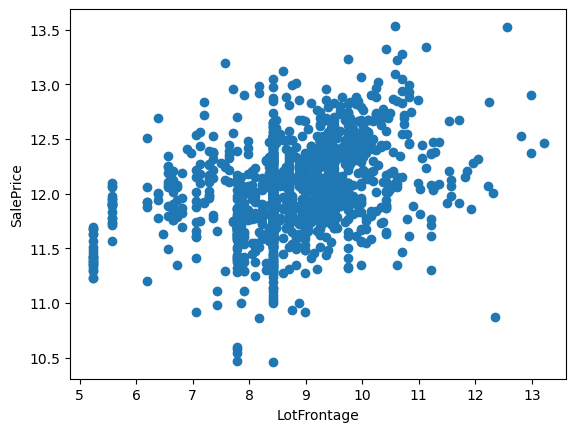

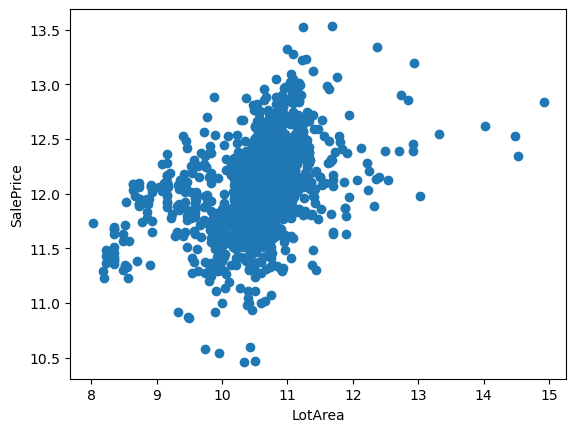

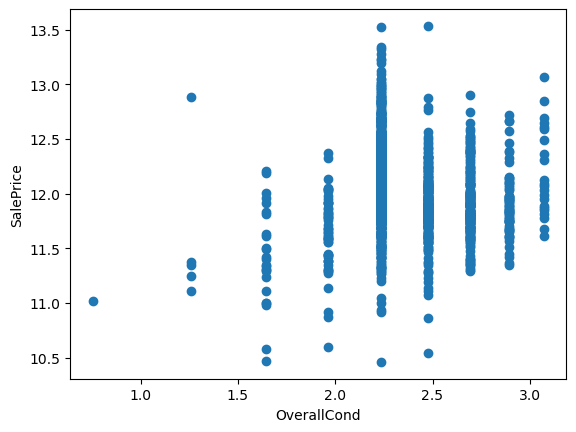

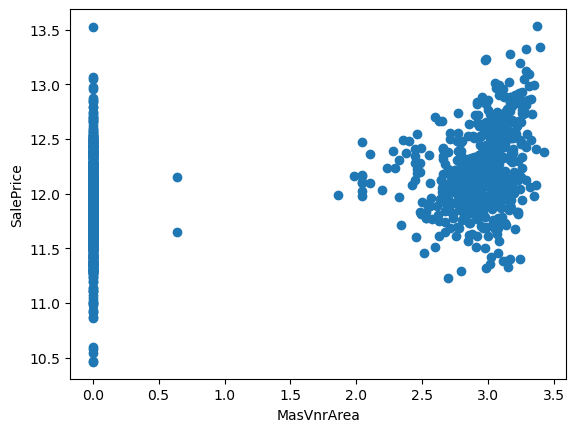

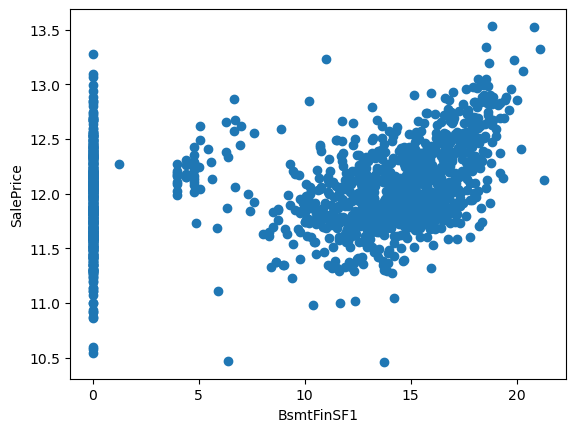

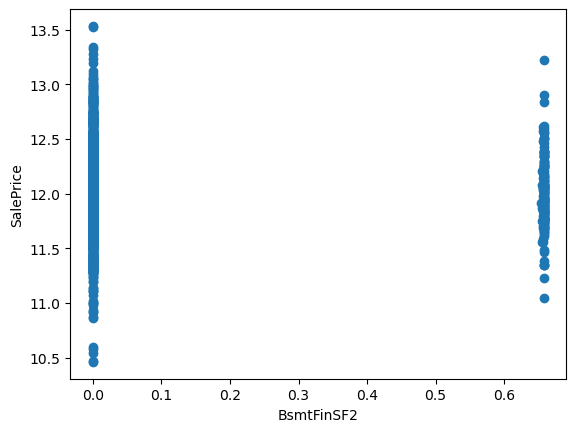

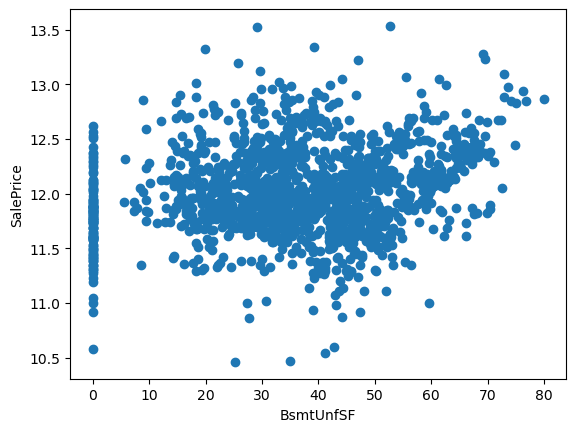

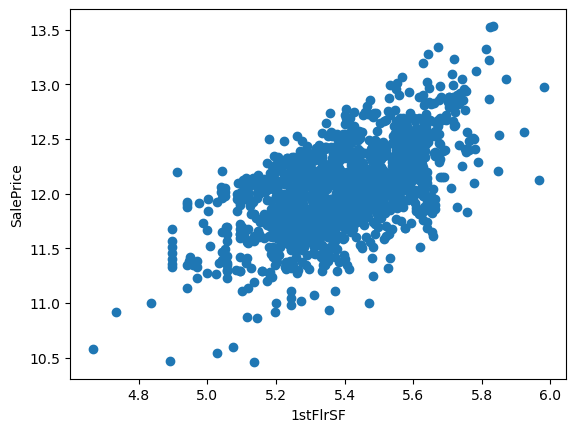

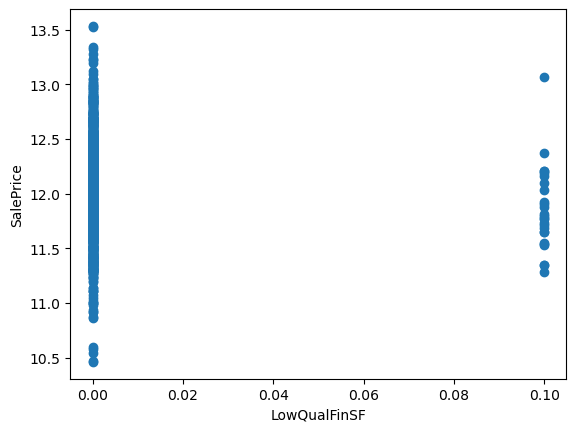

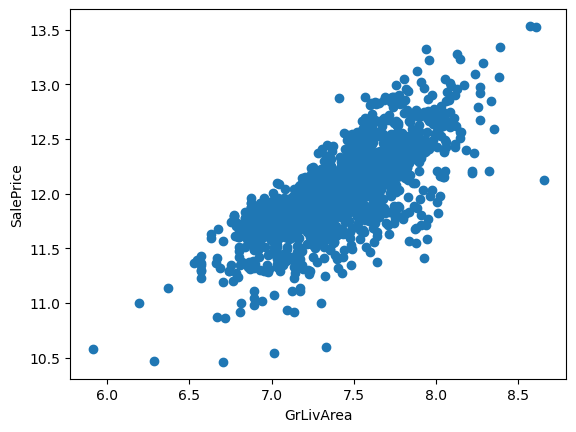

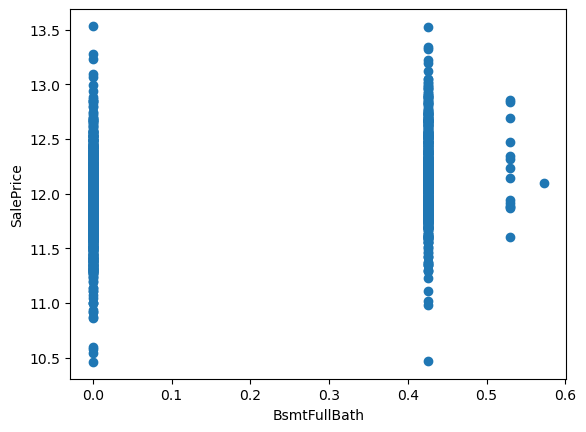

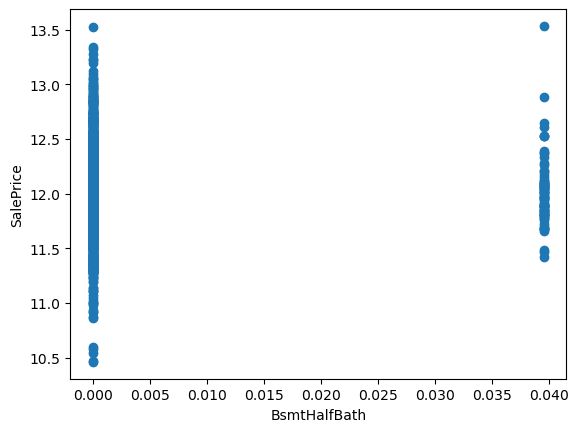

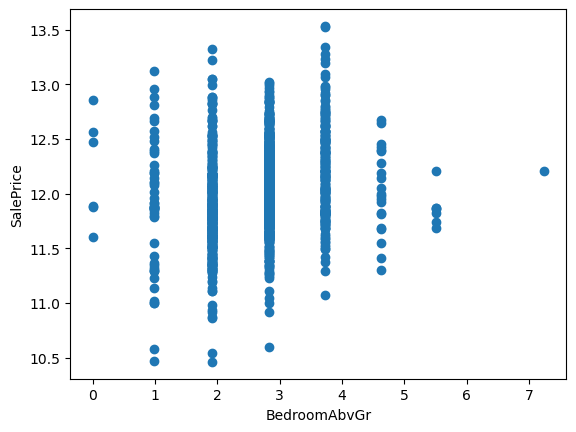

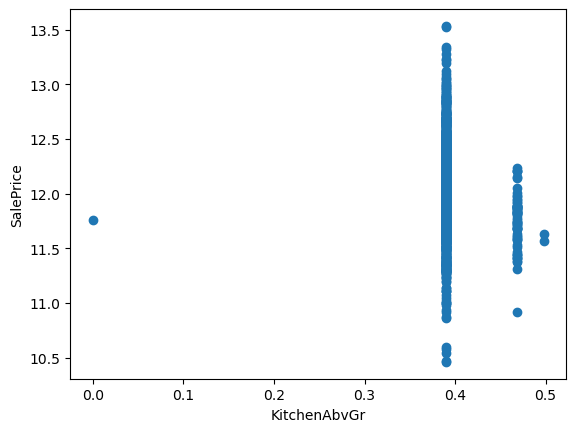

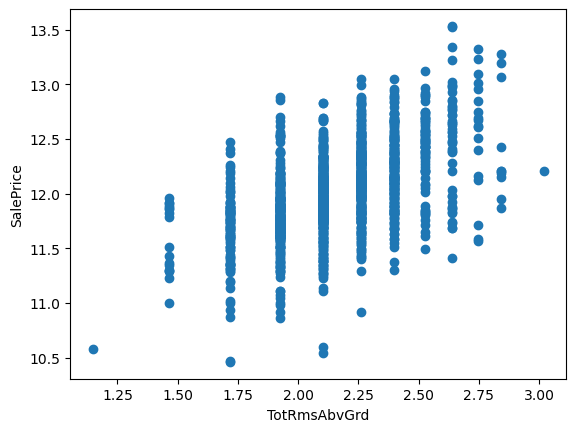

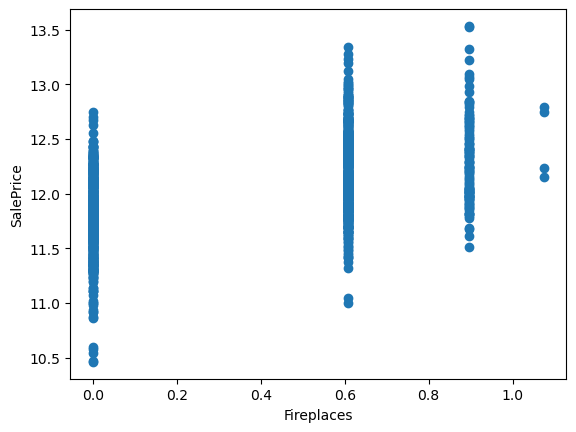

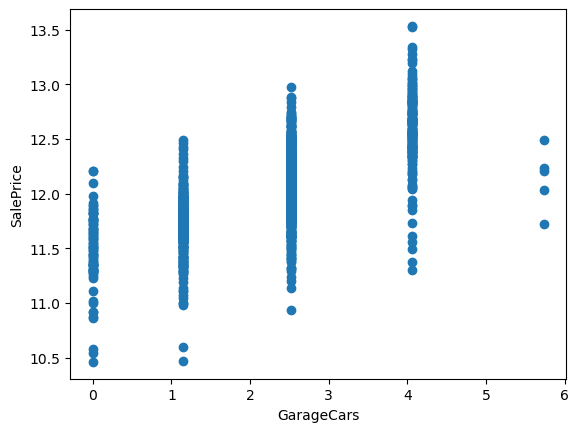

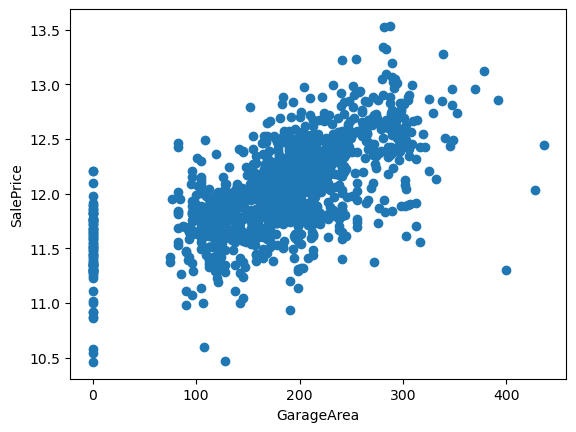

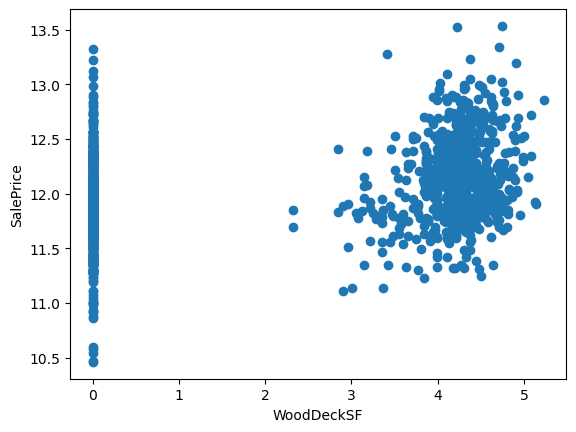

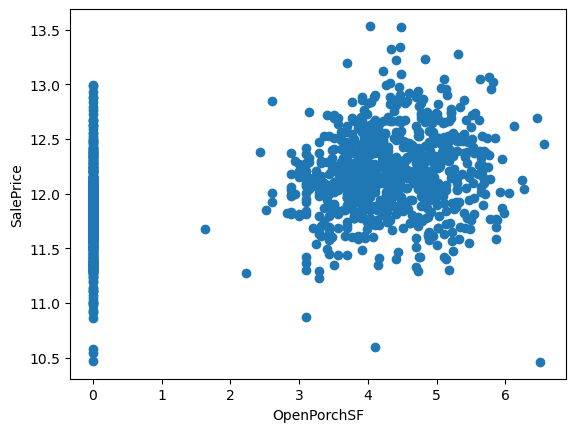

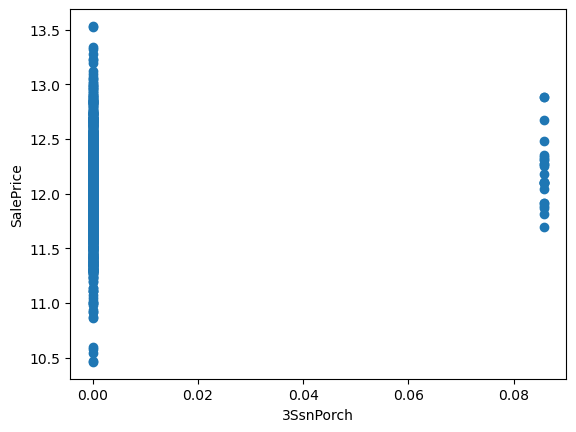

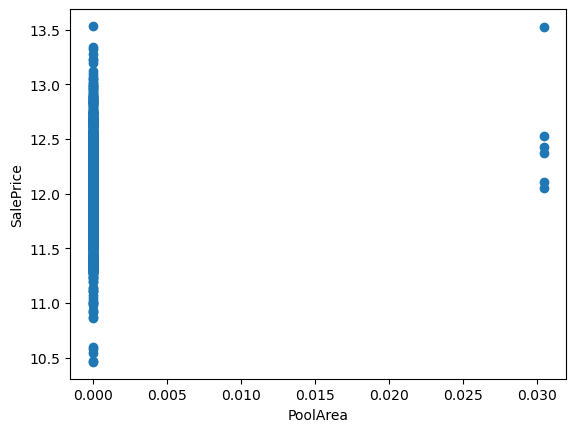

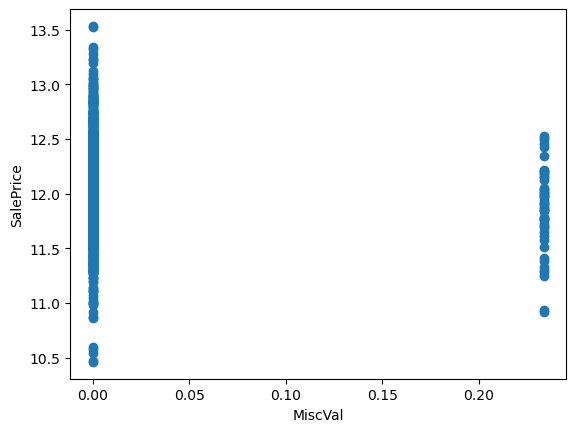

In [50]:
#Checking the bivariate graphs again to identify patterns:
for i in num_variables:
    plt.scatter(data2[i],data2['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

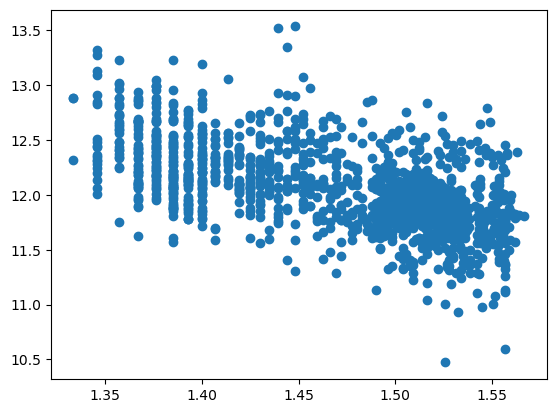

In [51]:
# Plotting the GarageAge against the non imputed values to understand the relationship:
plt.scatter(data2[data2['GarageAge']<1.6]['GarageAge'],data2[data2['GarageAge']<1.6]['SalePrice'])
plt.show()

## There is a clear linear relationship with the target variable and the following variables:
- As the PropertyAge increases, the SalePrice decreases
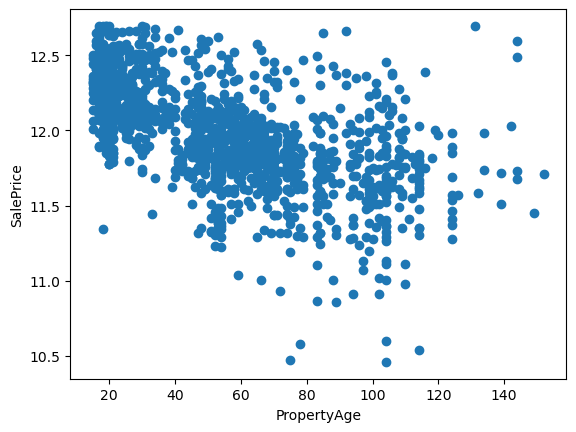
- As the RemodelAge increases, the SalePrice decreases
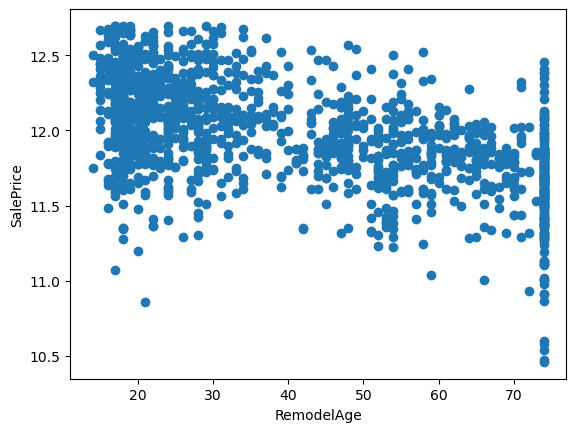

- As the GarageAge increases, the SalePrice decreases
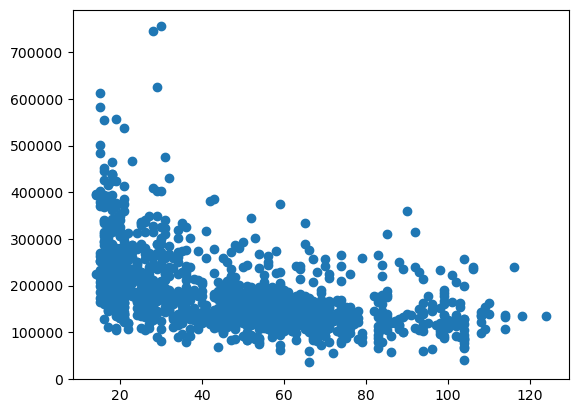

In [52]:
data2['YrSold']

Id
1       0.004484
2       0.004484
3       0.004484
4       0.004484
5       0.004484
          ...   
1456    0.004484
1457    0.004484
1458    0.004484
1459    0.004484
1460    0.004484
Name: YrSold, Length: 1457, dtype: float64

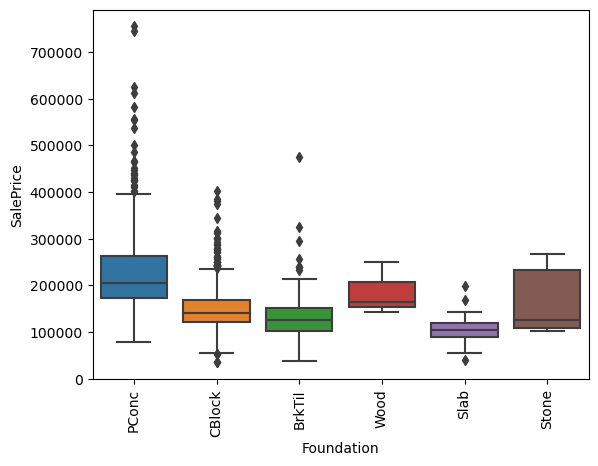

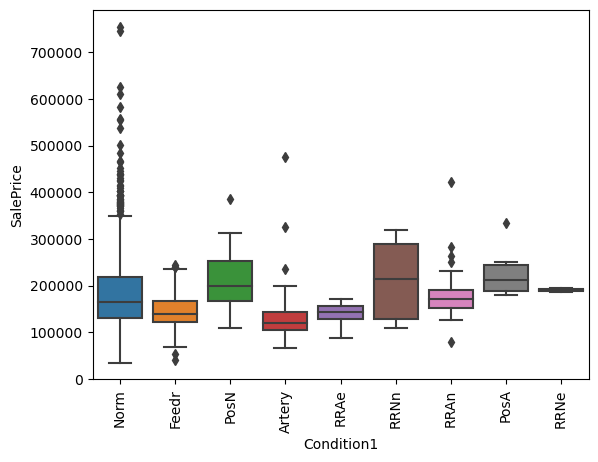

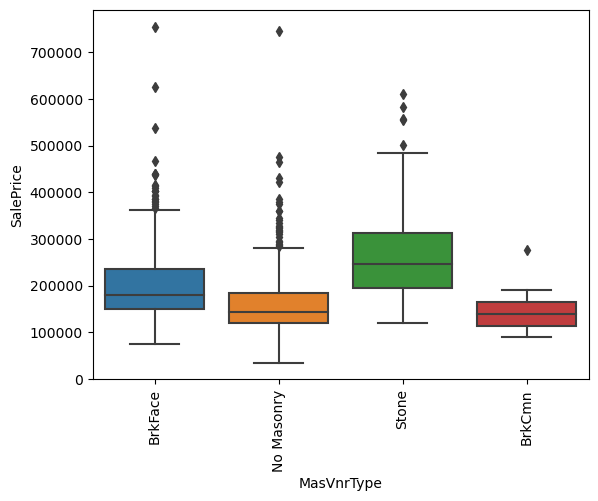

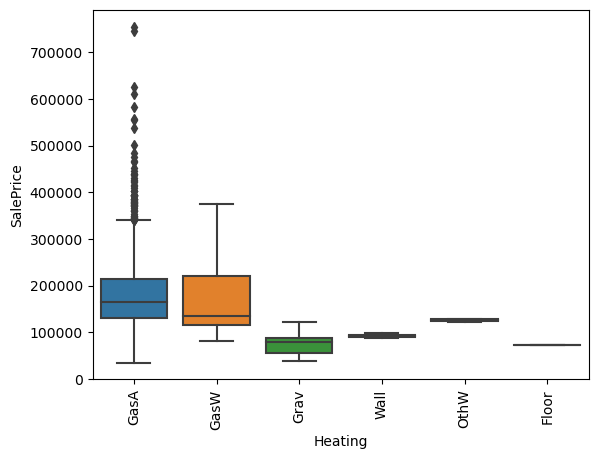

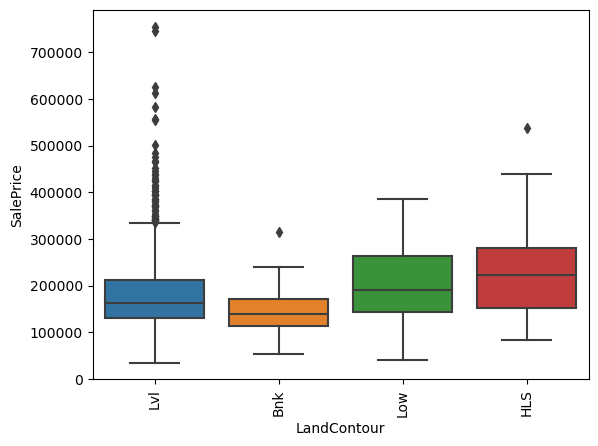

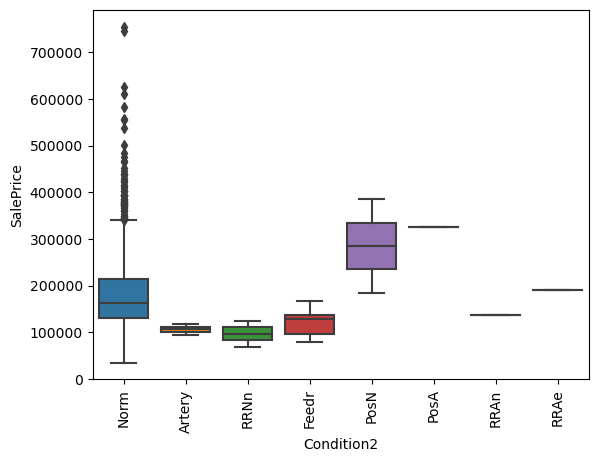

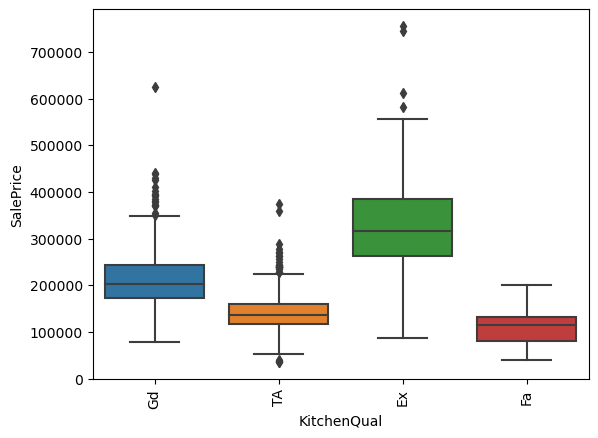

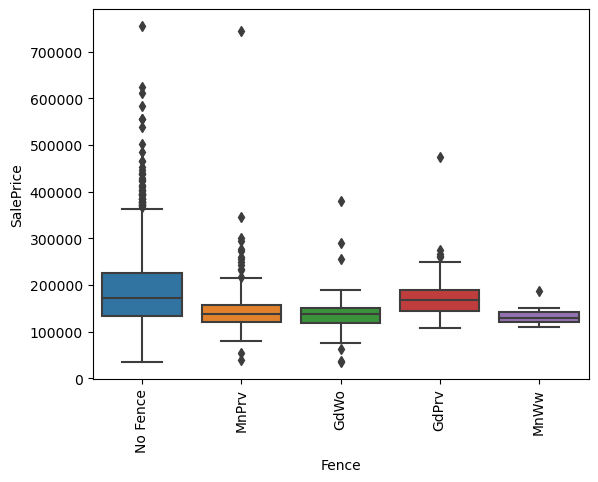

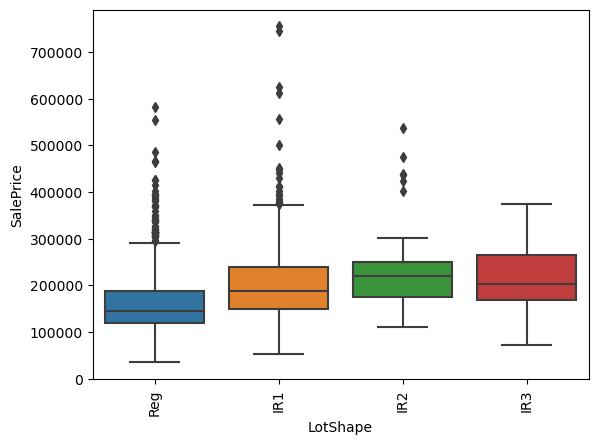

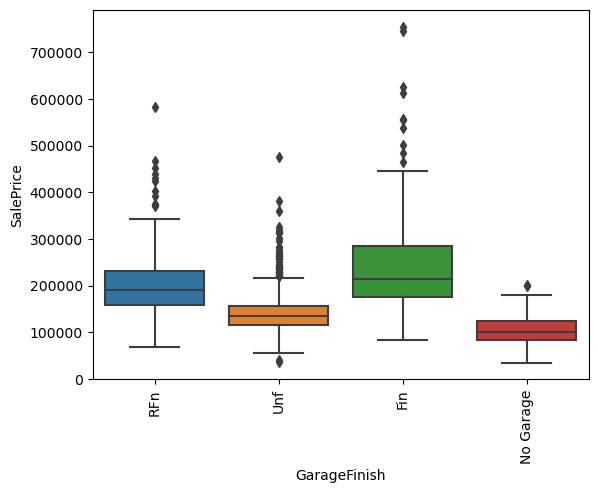

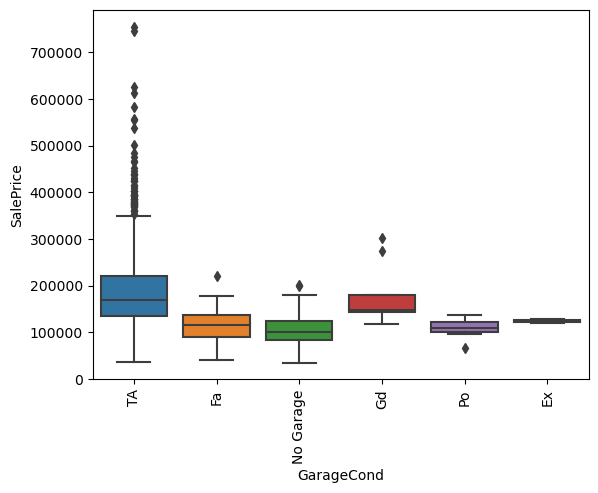

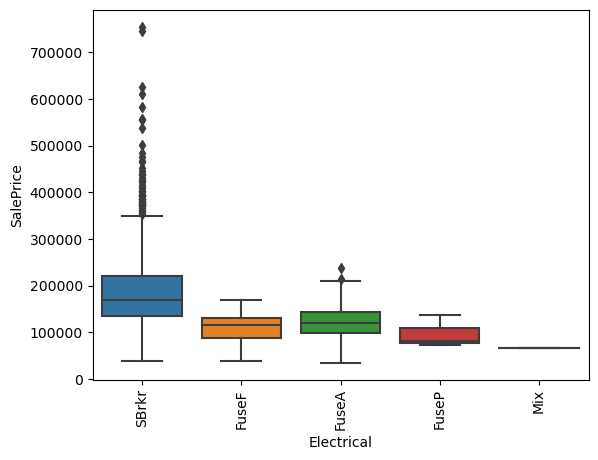

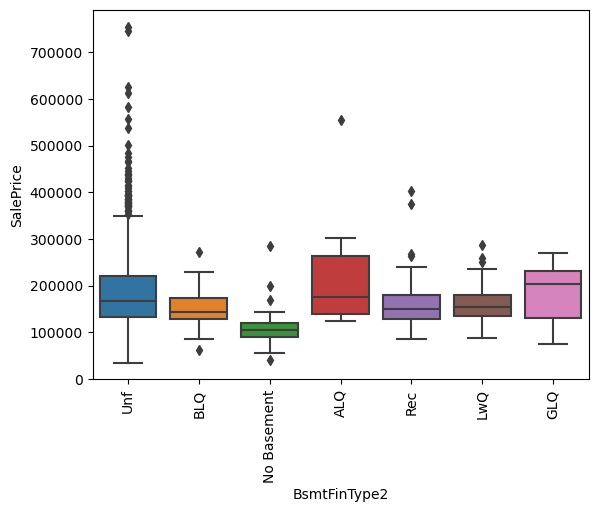

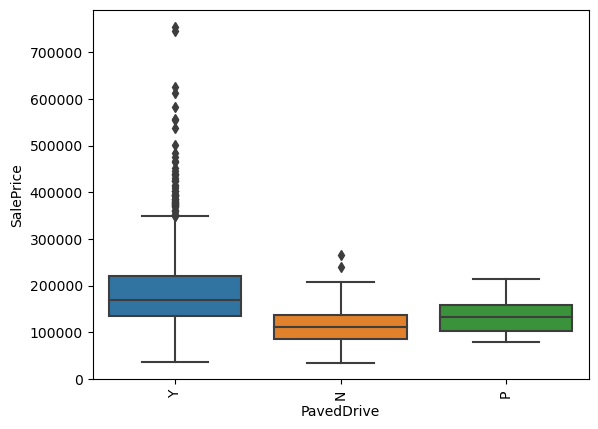

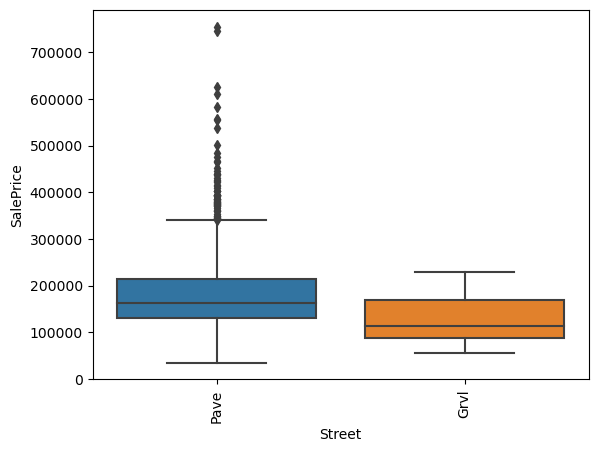

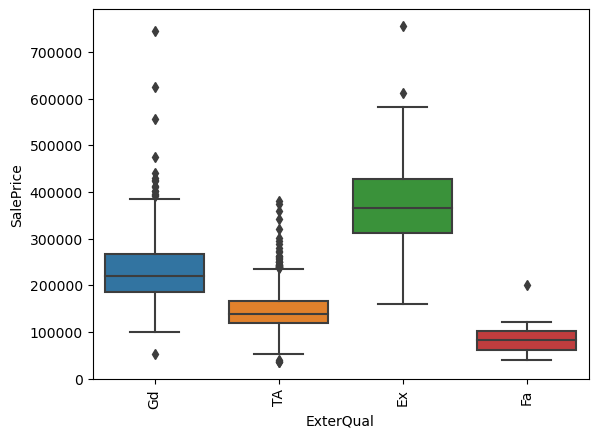

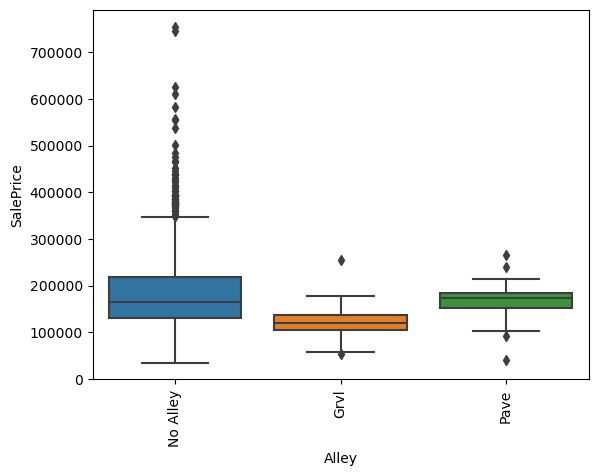

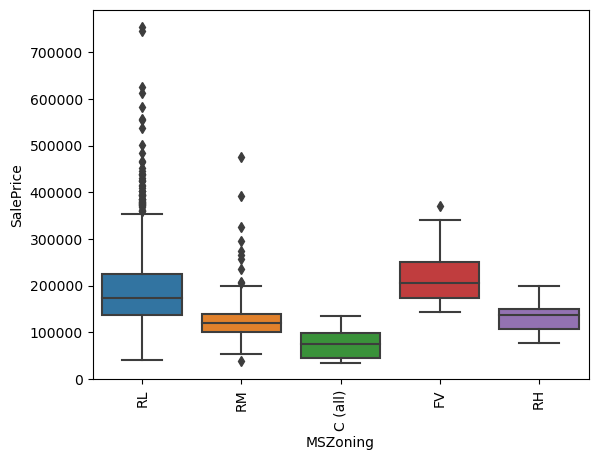

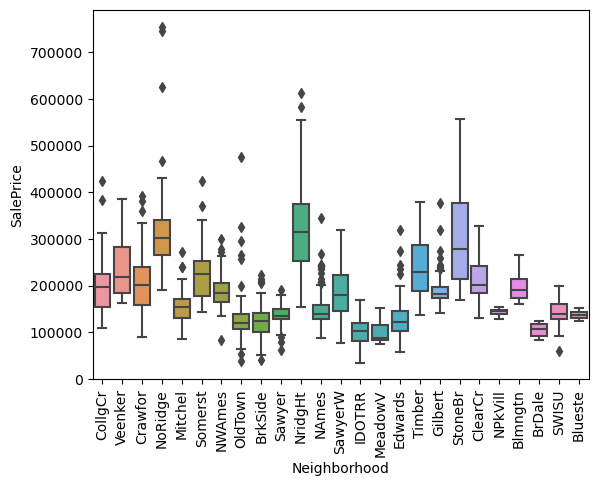

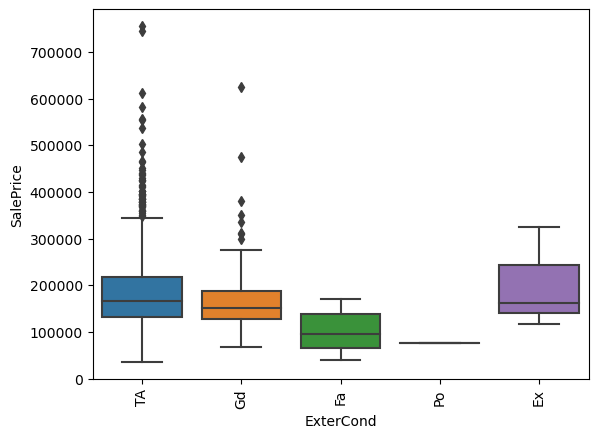

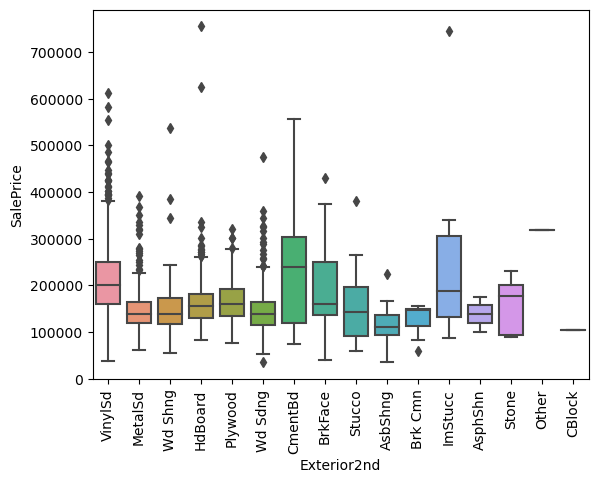

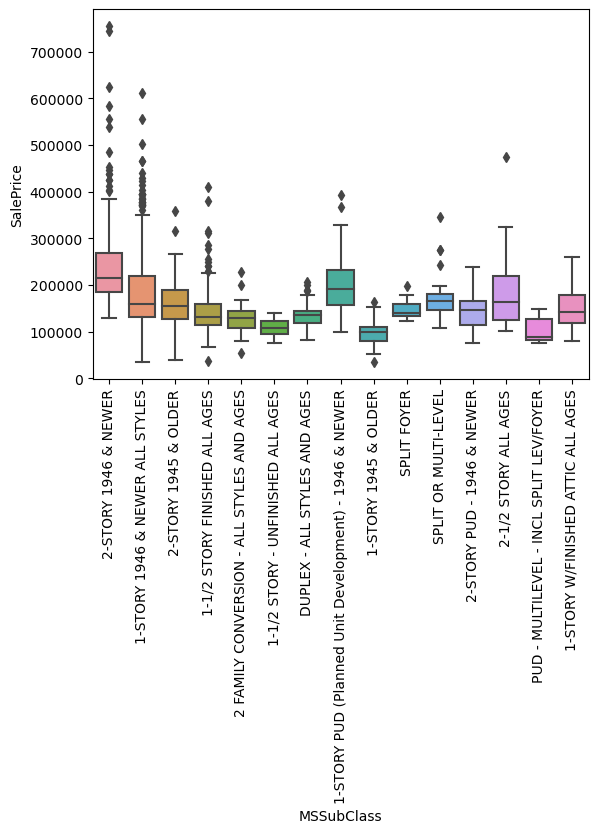

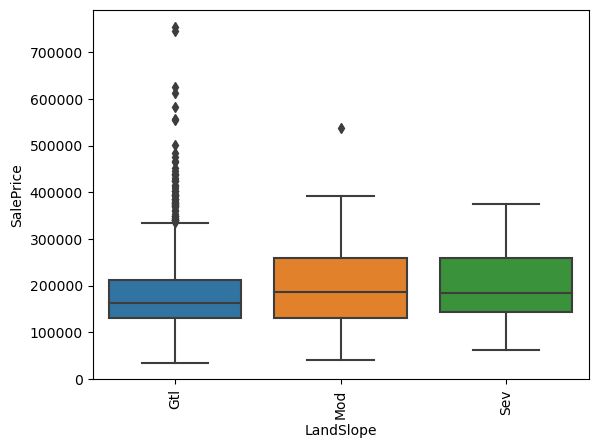

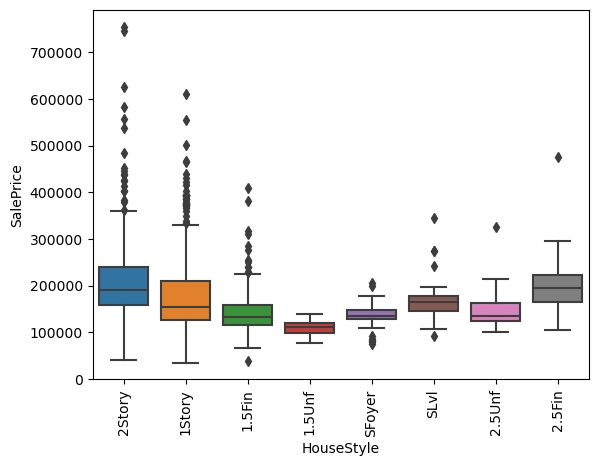

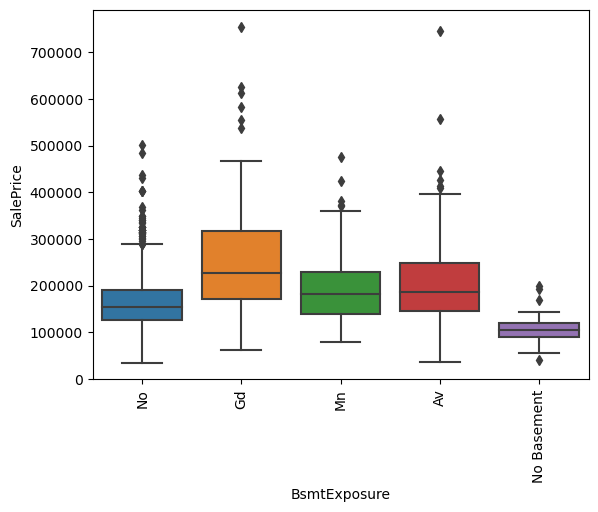

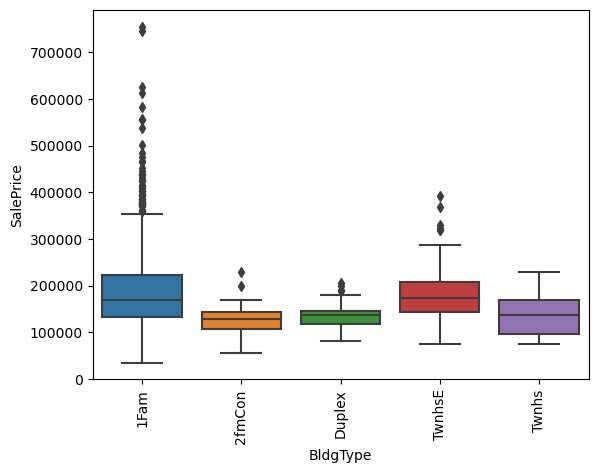

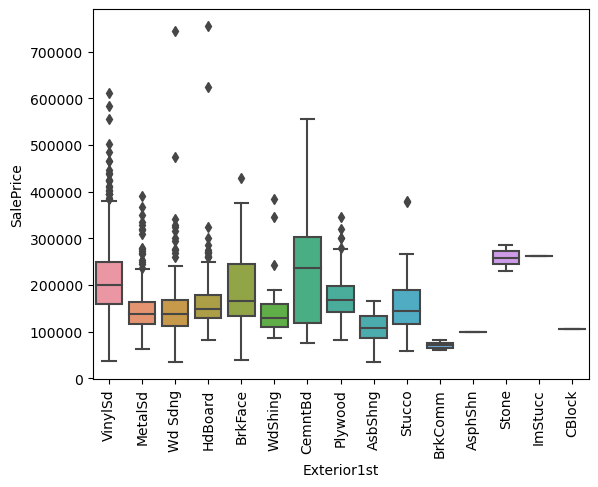

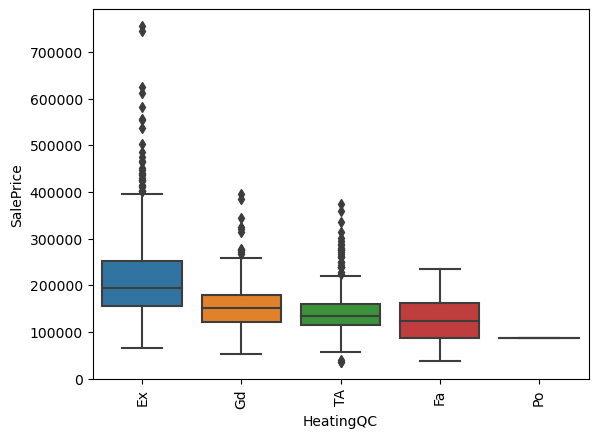

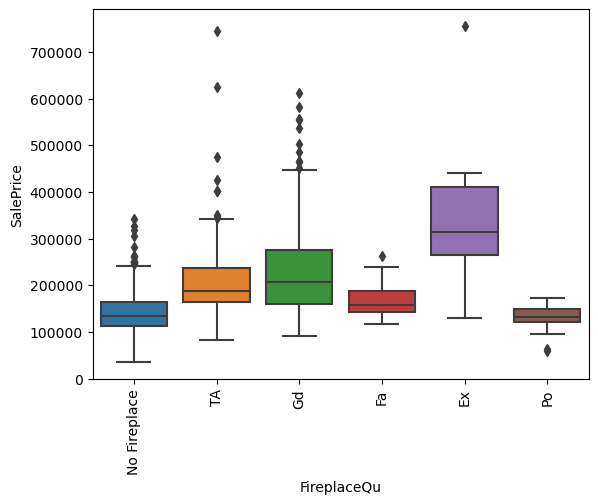

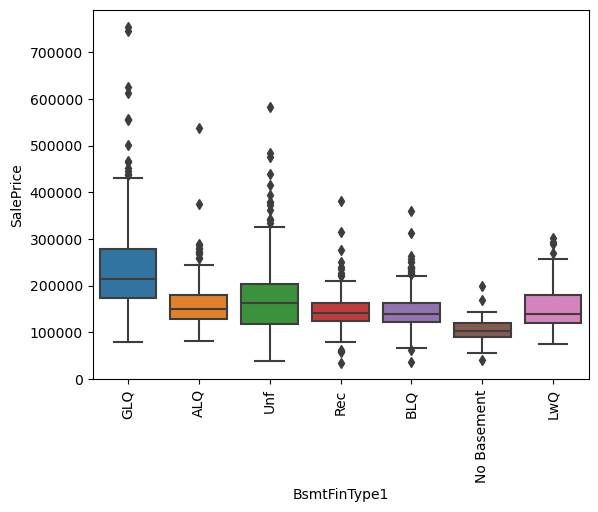

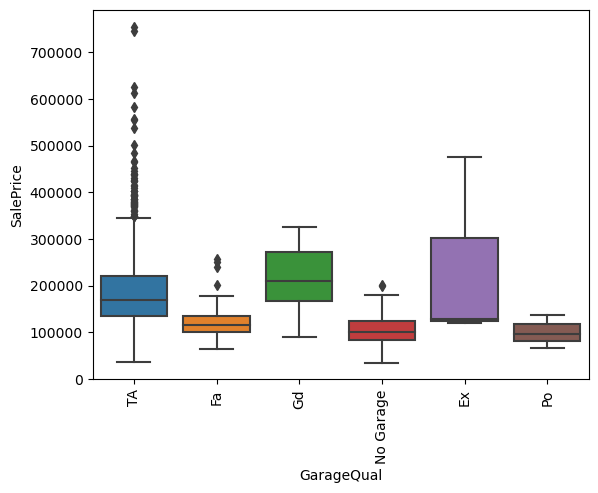

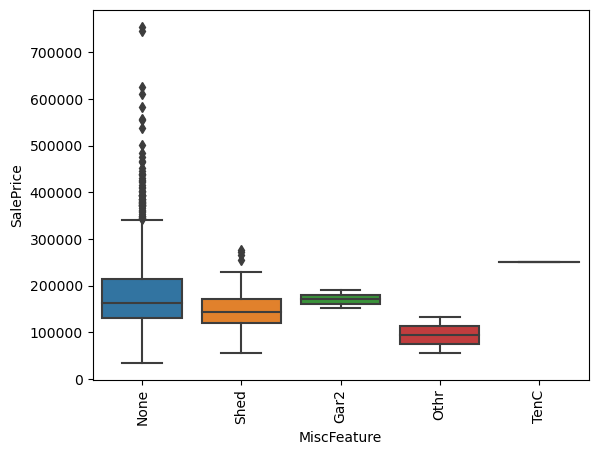

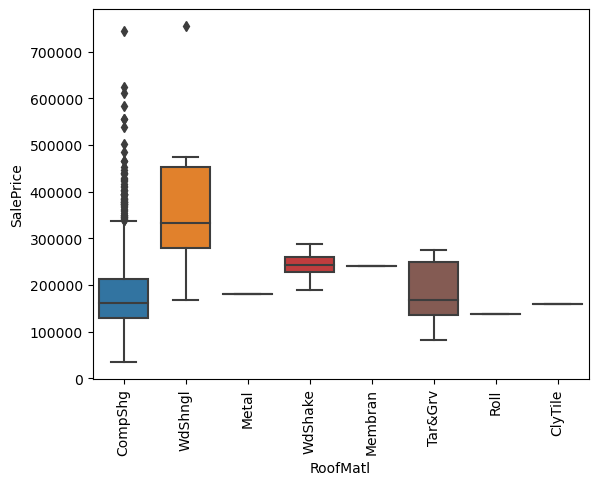

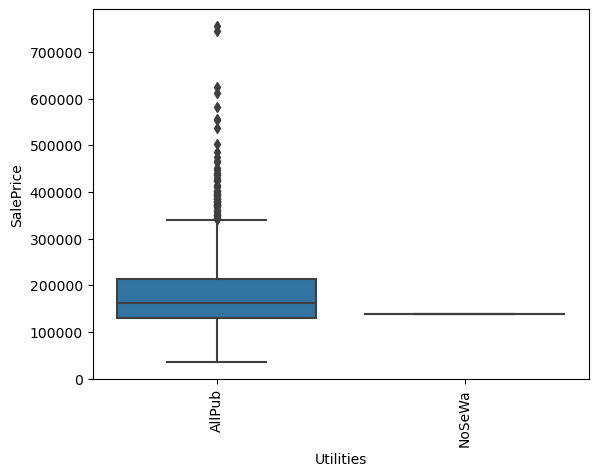

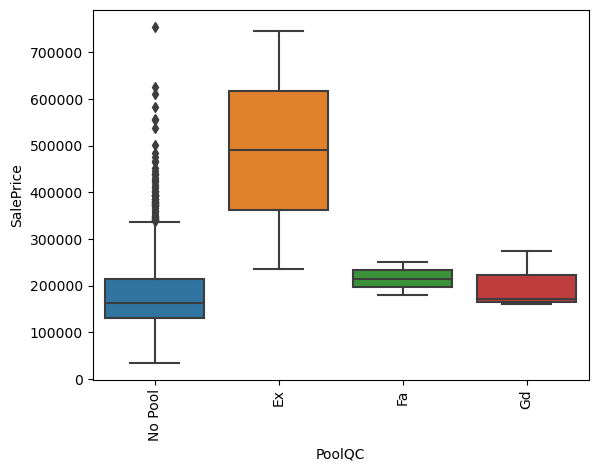

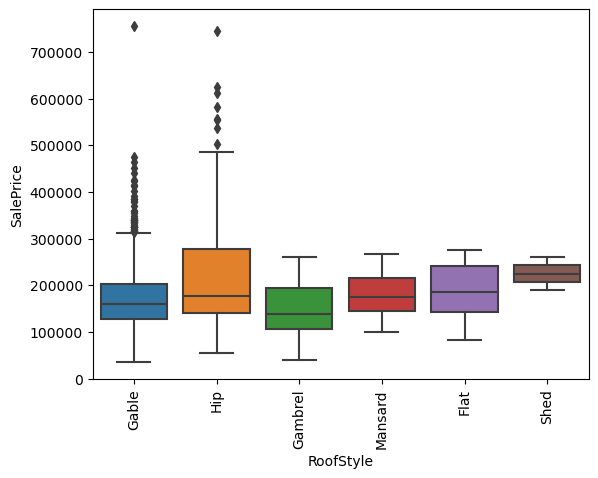

In [53]:
# Checking the boxplot of saleprice with categorical variables to identify trends and understand the variance:
for i in num_variables:
    if i=='SalePrice':
        
        for j in cat_variables:
            sns.boxplot(y=data[i],x=data[j])
            plt.xticks(rotation=90)
            plt.show()

- The graph below clearly shows that the median price is high for certain neighbourhoods like: Northridge Heights,<br>Stone Brook etc.
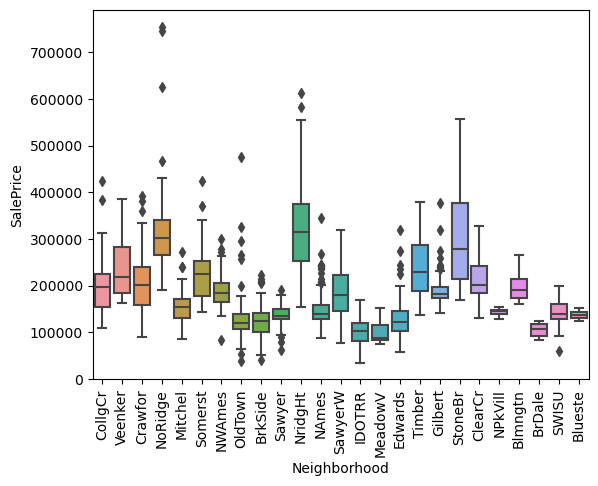
- The Cement Board type exterior covering on house has a significant effect on price
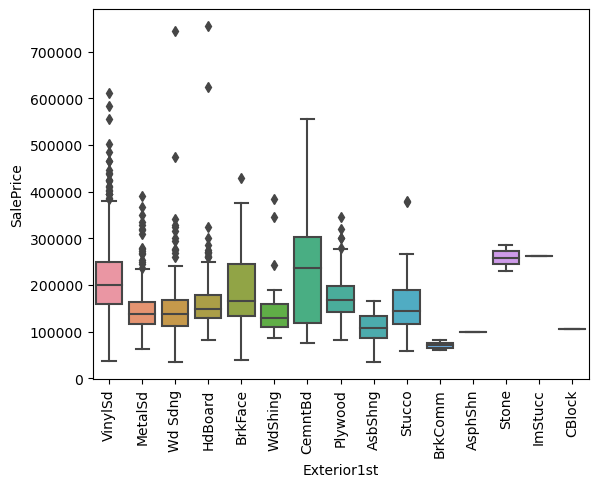
- Floating Village Residential type Zoning has higher price of property
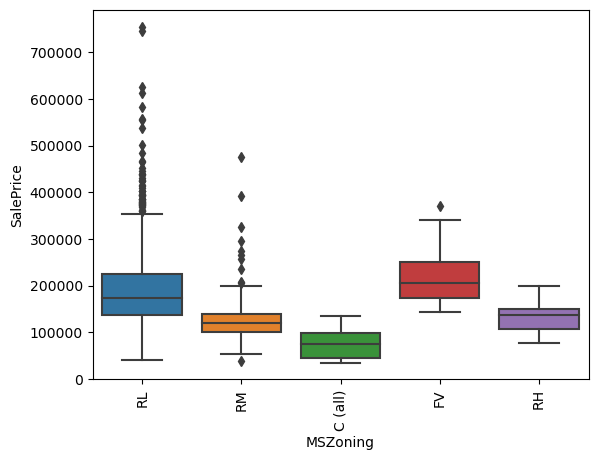
- Wood Shingles type roof material have significantly higher price
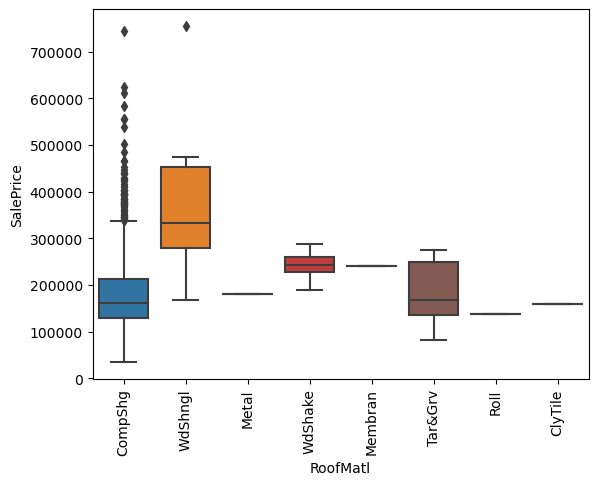
- Properties that are adjacent and near positive off-site feature like park, greenbelt, etc. are priced more
![image-5.png](attachment:image-5.png
- Stone Masonry Veneer type has higher price:
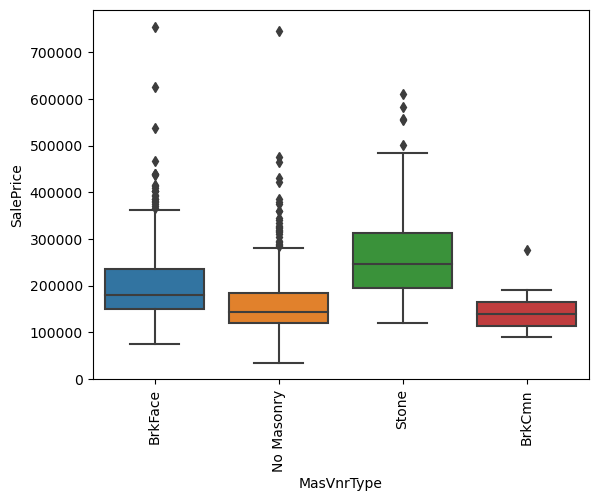
- Homes which are under construction have higher prices
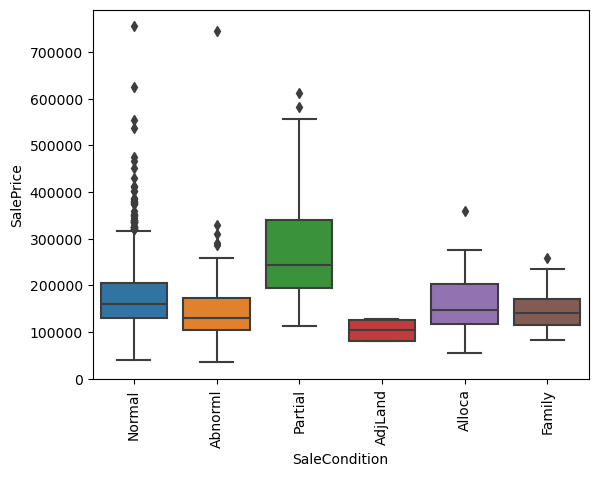
- Better the kitchen Quality higher the property price
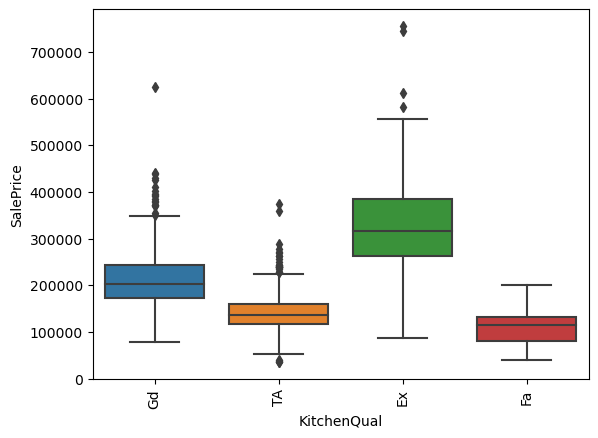
- Better the fireplace quality higher is the price of property
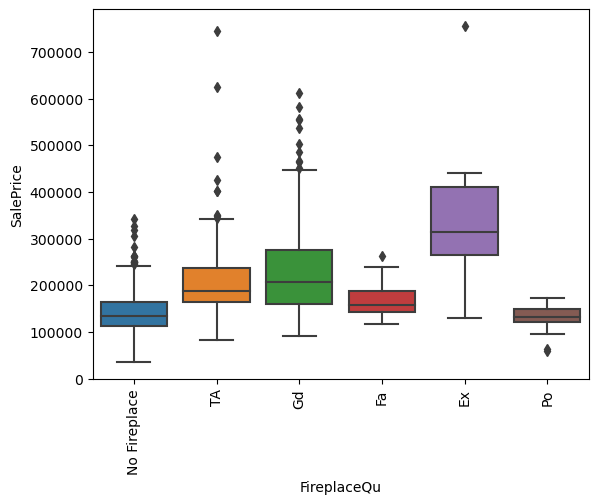
- Better the basement quality higher the price
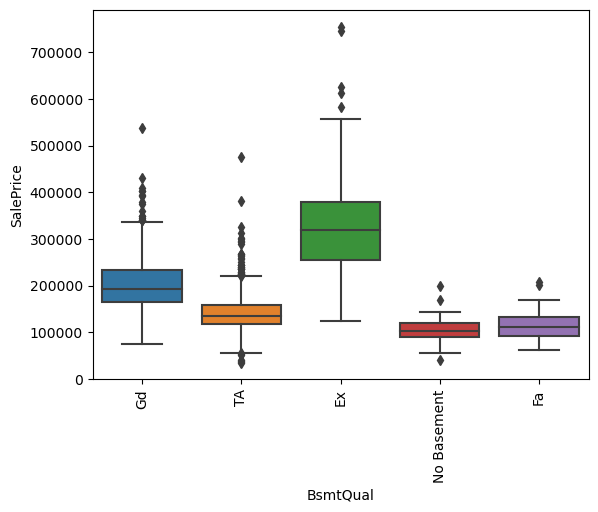
- Prices rise with better exterior quality
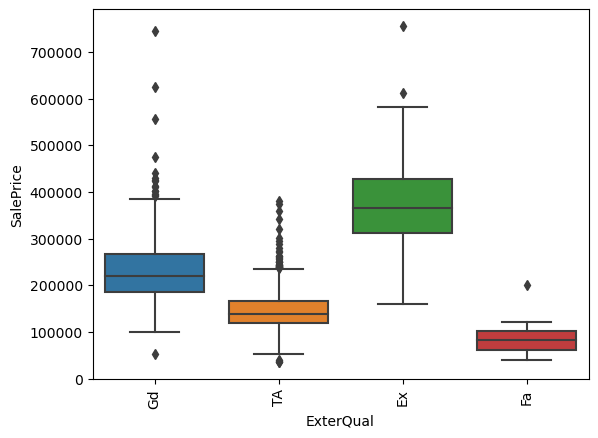
- More the number of storeys higher the price
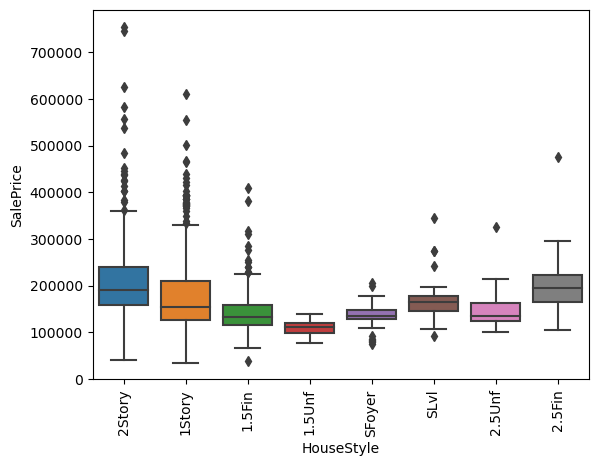

## MultiVariate Analysis:

In [54]:
num_variables.remove('YrSold')

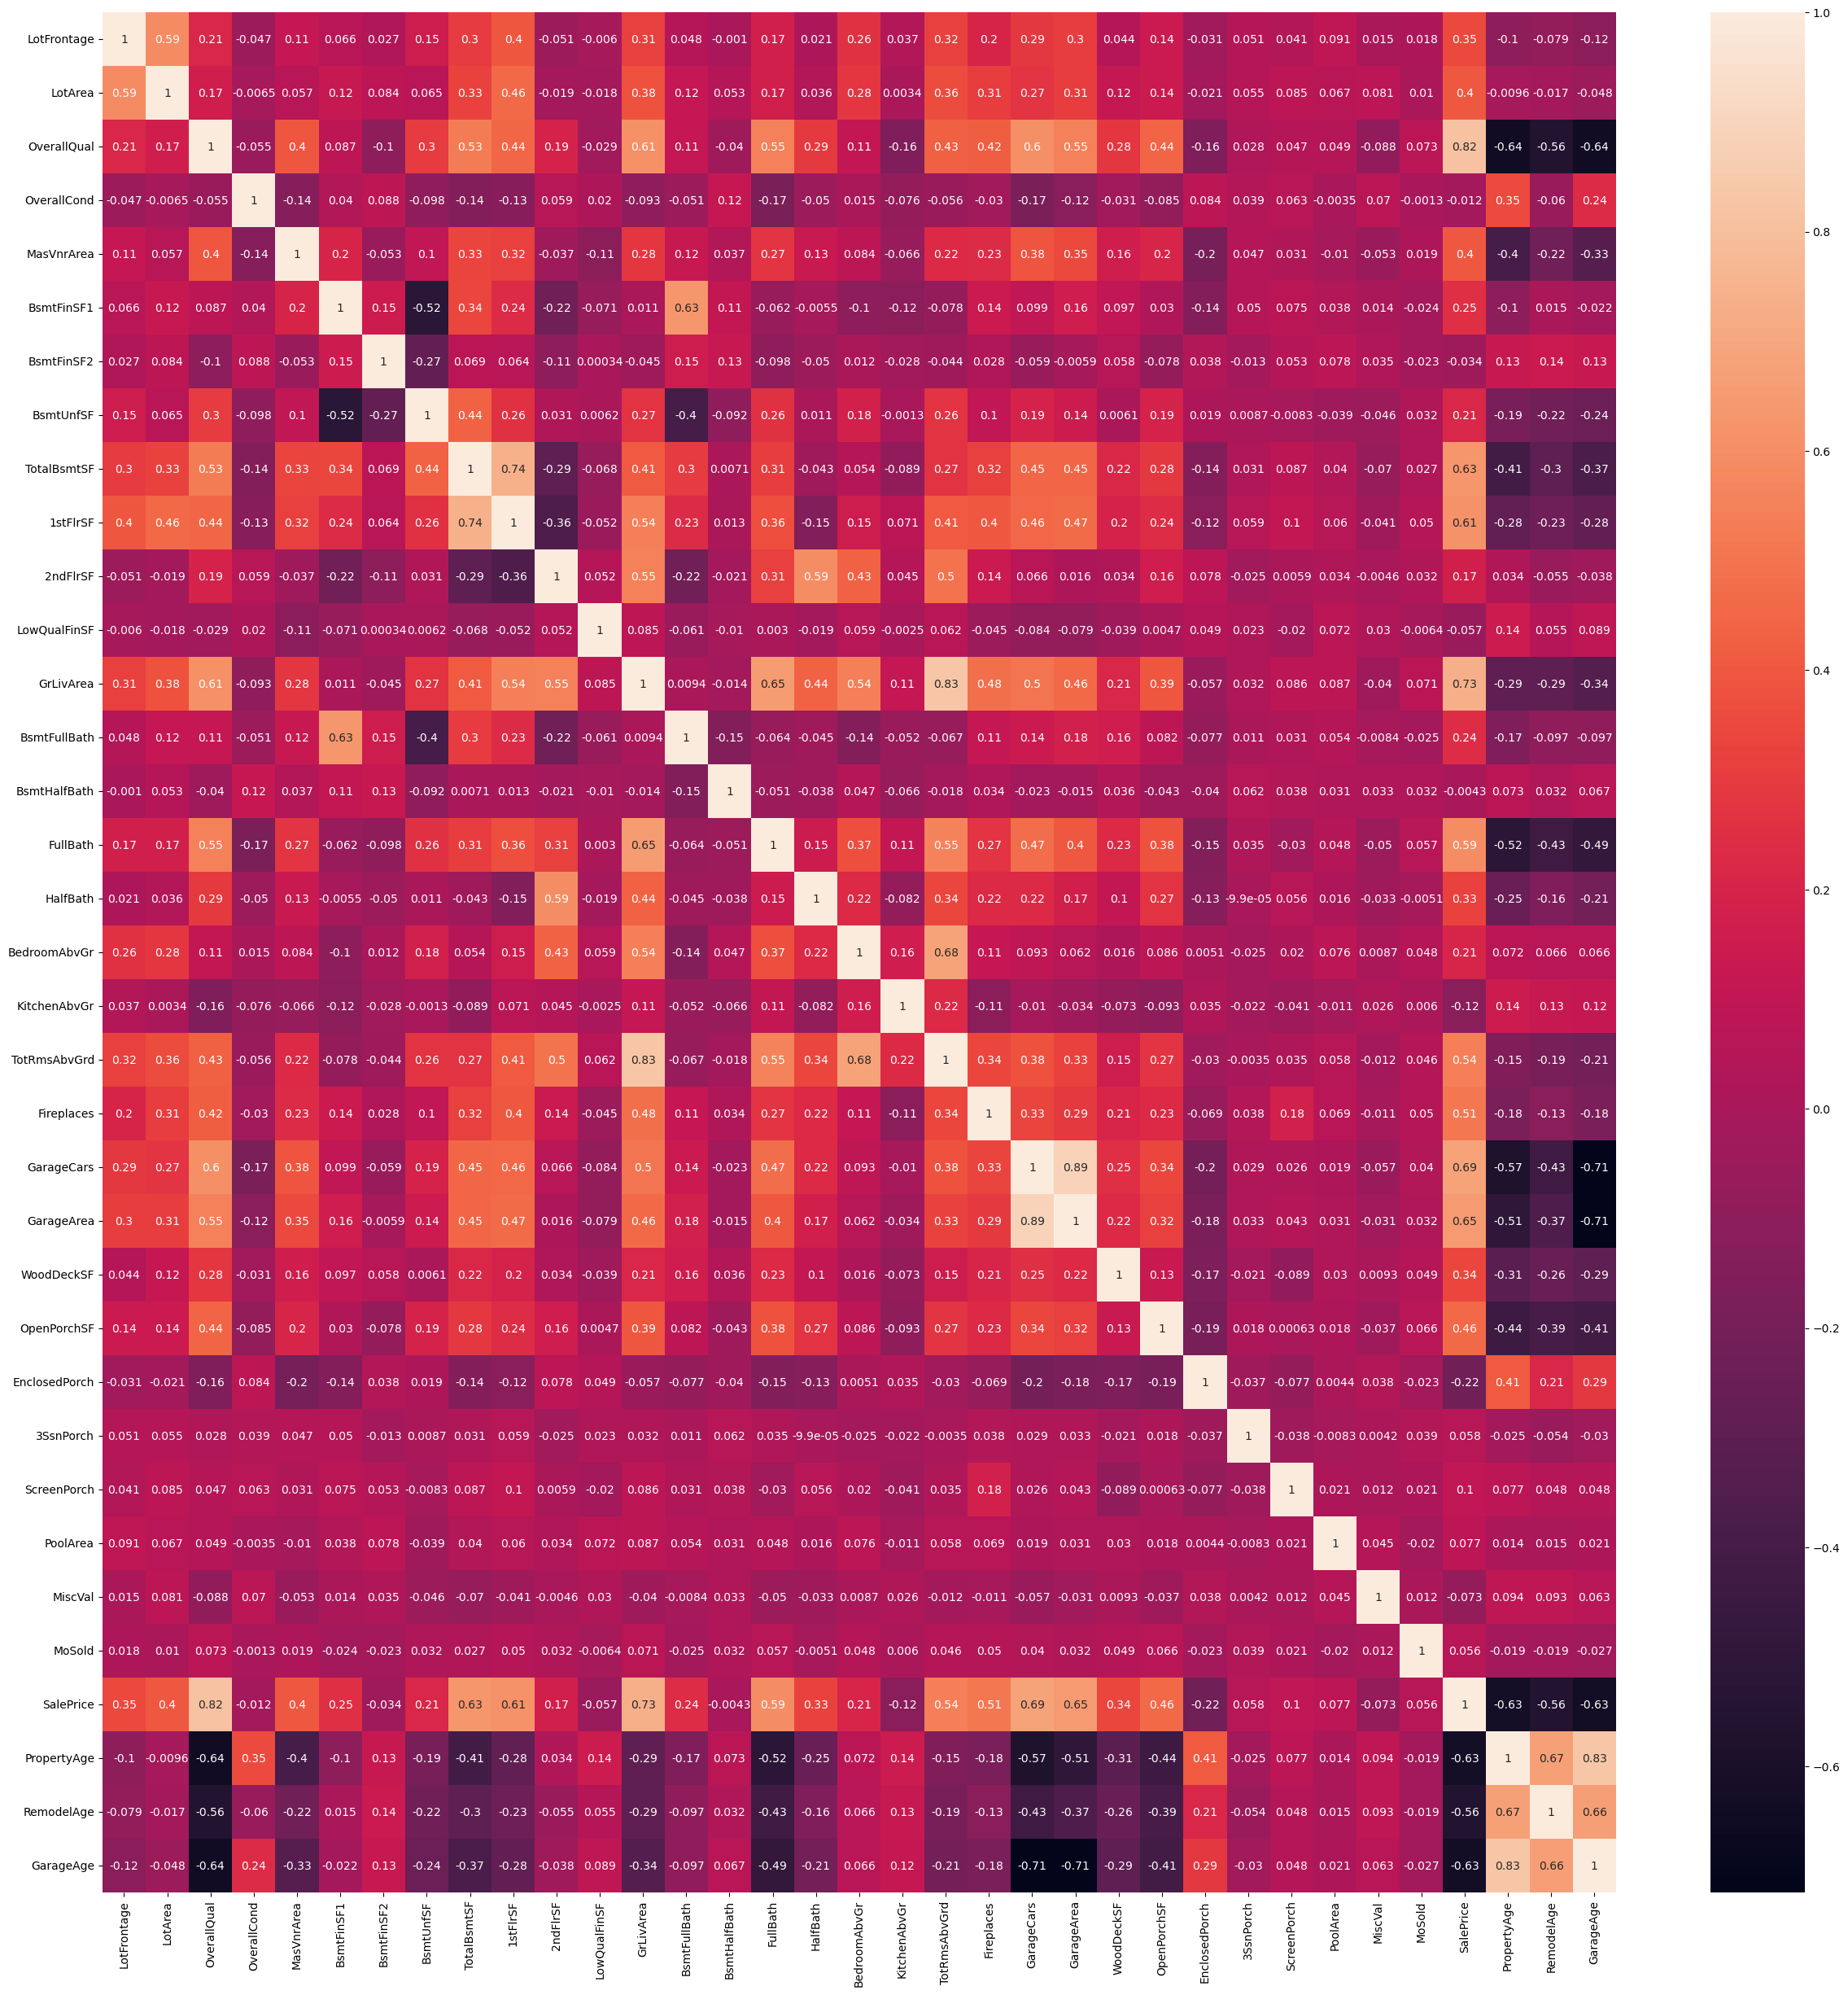

In [55]:
#Plotting the heatmap to identify multicollinearity and relationship between target and predictor variables:
plt.figure(figsize=(30,30))
sns.heatmap(data2[num_variables].corr(),annot=True)
plt.show()

## Few of the variables have very high-correlation between them like:
- GrLivArea and TotRmsAbvGr(0.82)
- TotalBsmtSF and 1stFlrSF(0.77)
- GarageCars and GarageArea(0.88)
- BsmtFinSF1 and BsmtFullBath(0.64)
- GrLivArea and 2ndFlrSF(0.7)
- BsmtUnfSF and BsmtFinSF1(-0.55)
- GarageAge and PropertyAge(0.83)
- RemodelAge and PropertyAge(0.67)
- LotFrontage and LotArea(0.59

In [56]:
data2=data2.drop(['TotRmsAbvGrd','1stFlrSF','GarageCars','BsmtFullBath','2ndFlrSF','BsmtUnfSF','RemodelAge','GarageAge'
                  ,'LotFrontage'],axis=1)


In [57]:
num_variables.remove('TotRmsAbvGrd')
num_variables.remove('1stFlrSF')
num_variables.remove('GarageCars')
num_variables.remove('BsmtFullBath')
num_variables.remove('2ndFlrSF')
num_variables.remove('BsmtUnfSF')
num_variables.remove('GarageAge')
num_variables.remove('RemodelAge')
num_variables.remove('LotFrontage')

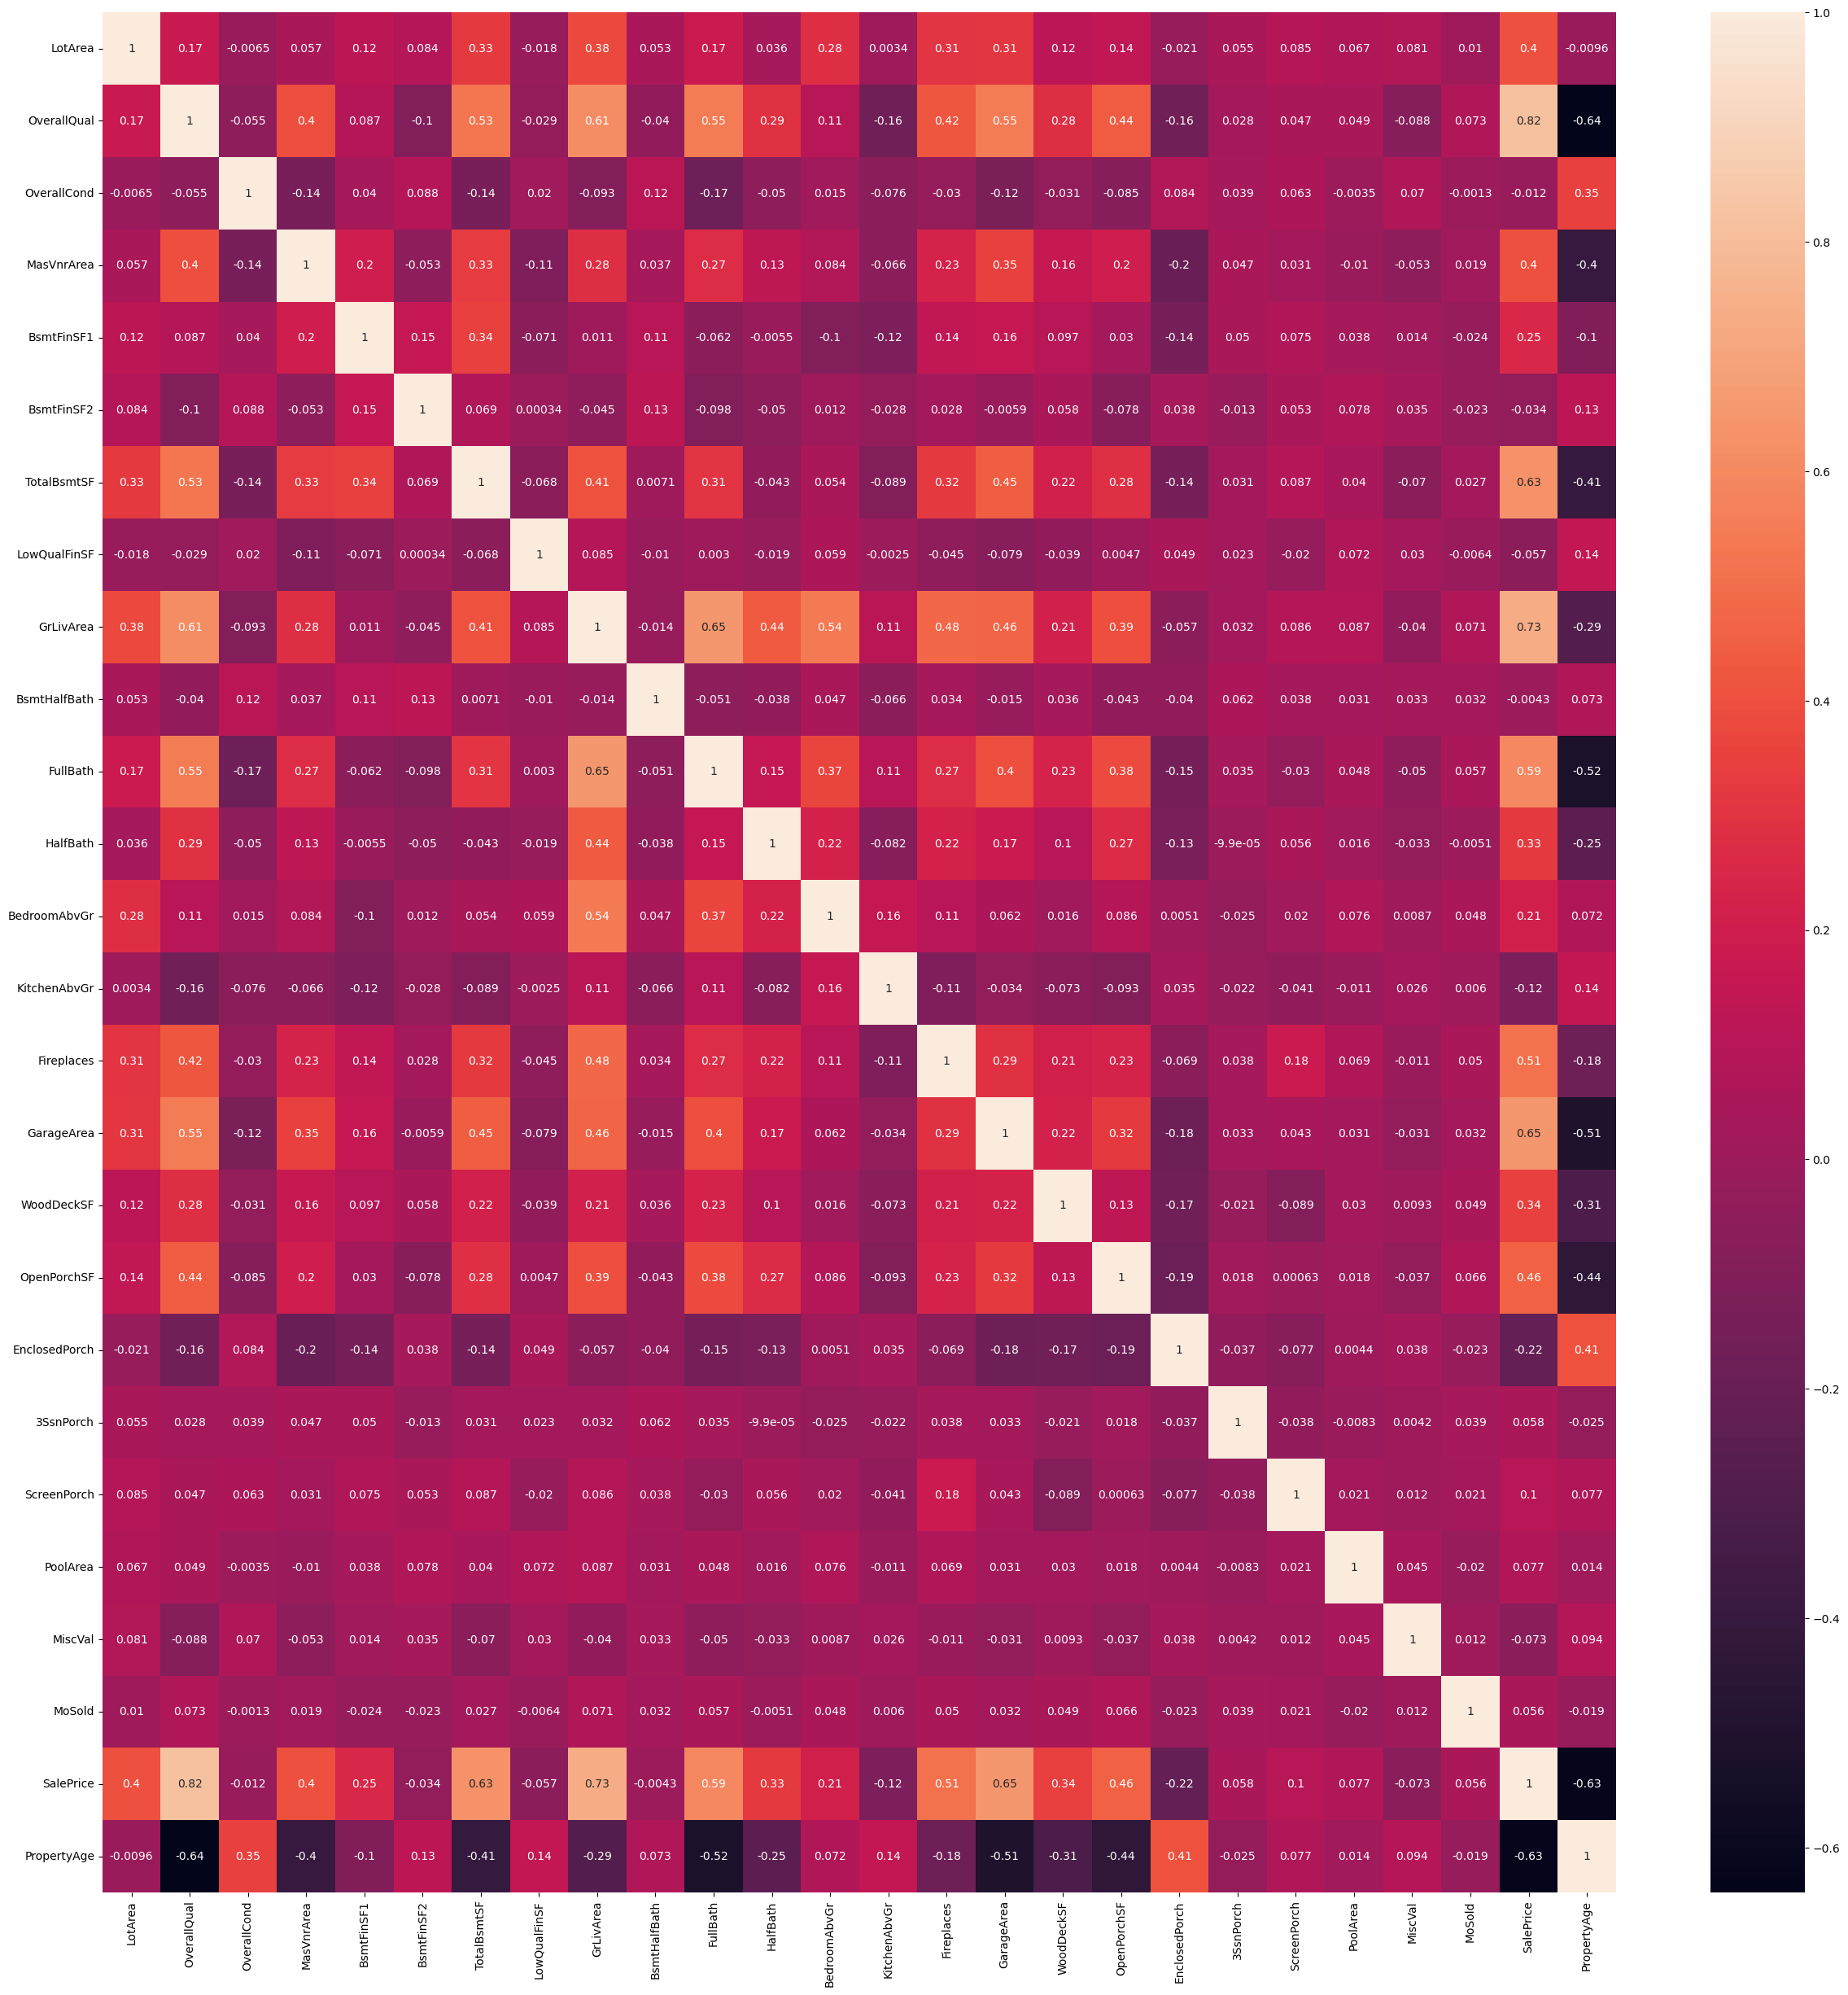

In [58]:
plt.figure(figsize=(30,30))
sns.heatmap(data2[num_variables].corr(),annot=True)
plt.show()


## Model Building:

In [59]:
# Importing all the Machine Learning libraries required:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
final_data=data2

In [60]:
# Splitting the X and y dataframe for Model Building:
y=np.array(final_data.pop('SalePrice'))
X=final_data

In [61]:
# Scaling the data before model building:
# Initiaiting the scaler
scaler=MinMaxScaler()
# Fitting and transforming the data:
X[X.columns]=scaler.fit_transform(X)
list(X.isna().sum())
X.shape

(1457, 263)

In [62]:
# Splitting into test and train set:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((1019, 263), (1019,), (438, 263), (438,))

## Model 1 (Simple OLS):

In [63]:
# Fitting a Ordinary Least Square Model:
# Initiating the regressor:
lr=LinearRegression()
# Fitting the model to the training data:
model=lr.fit(X_train,y_train)

In [64]:
# Predicting on the test data:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [65]:
# Checking the test and train score of the model:
train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred_test)
print('train_score:',train_score,' and ','test_score:',test_score)

train_score: 0.9541646750233962  and  test_score: -2.815456230741895e+18


### It is evident that the train score is very good while the testing score is miserably bad indicating that the model has overfit the data. Hence now we need to shift to algorithm that takes care of overfitting. We can proceed with Ridge and Lasso Regression to check their accuracy and decide accordingly.

## Model 2 (Ridge Regression):

### Applying Ridge Regression and doing Hyperparameter Tuning:

In [66]:
# Initiating lambdas to check in gridsearchcv:
lambdas=[0,0.01,0.1,1,5,10,50,100,500,1000,5000,10000,50000,100000]
#Initiating the ridge regressor:
ridge=Ridge()
#Fitting the ridge regressor:
ridge.fit(X_train,y_train)

# Using Gridsearch cv with default 5 fold validation to find the best hyper parameeter:
model_cv=GridSearchCV(ridge,param_grid={'alpha':lambdas},scoring='r2',return_train_score=True,verbose=3)

# Fitting the gridsearch model:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END alpha=0;, score=(train=0.958, test=-23047666576201053607297024.000) total time=   0.1s
[CV 2/5] END alpha=0;, score=(train=0.955, test=-352162843211781279127175168.000) total time=   0.2s
[CV 3/5] END alpha=0;, score=(train=0.953, test=-195332963558097374687526912.000) total time=   0.5s
[CV 4/5] END alpha=0;, score=(train=0.950, test=-119865693436932042977705984.000) total time=   0.2s
[CV 5/5] END alpha=0;, score=(train=0.937, test=-313119064945712567569874944.000) total time=   0.1s
[CV 1/5] END ....alpha=0.01;, score=(train=0.962, test=0.867) total time=   0.0s
[CV 2/5] END ....alpha=0.01;, score=(train=0.960, test=0.887) total time=   0.0s
[CV 3/5] END ....alpha=0.01;, score=(train=0.958, test=0.821) total time=   0.0s
[CV 4/5] END ....alpha=0.01;, score=(train=0.958, test=0.884) total time=   0.0s
[CV 5/5] END ....alpha=0.01;, score=(train=0.955, test=0.911) total time=   0.0s
[CV 1/5] END .....alpha=0.1;, 

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000,
                                   5000, 10000, 50000, 100000]},
             return_train_score=True, scoring='r2', verbose=3)

In [67]:
# Finding the best alpha:
best_alpha=model_cv.best_params_['alpha']
best_alpha

1

### The best alpha for Ridge Regression is 1.

In [68]:
# Applying Ridge Regression with alpha=1:
ridge=Ridge(alpha=best_alpha)
# Fitting on the train data:
ridge_reg=ridge.fit(X_train,y_train)



### Ridge Model Evaluation:

In [69]:
# Predicting on the train and test data to check the scores:
y_pred_train=ridge_reg.predict(X_train)
y_pred_test=ridge_reg.predict(X_test)

# Trian and test score:
train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred_test)

print('train_score:',train_score,' test_score:',test_score)
mse=mean_squared_error(y_test,y_pred_test)
print('root mean squared error:',np.sqrt(mse))

train_score: 0.9470828426203765  test_score: 0.9051759780576516
root mean squared error: 0.12666337677440478


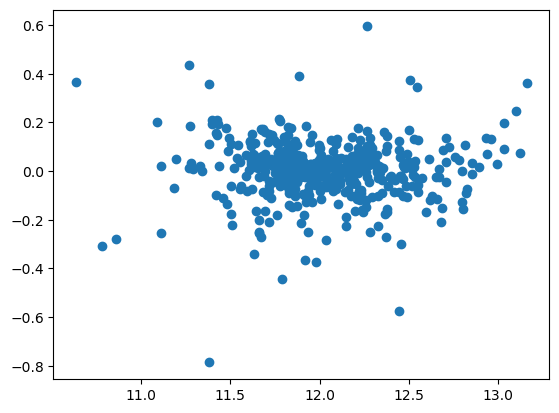

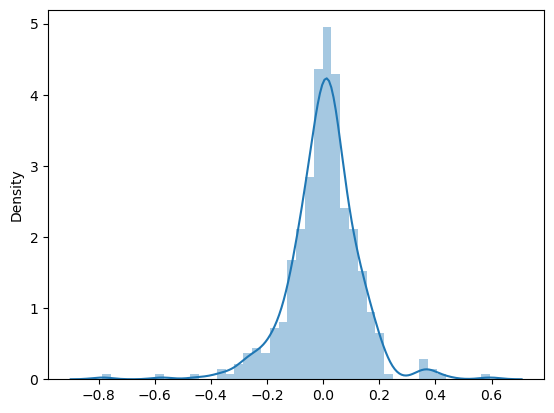

In [70]:
# Checking the residual plots and evaluating the worthiness of the fit:
res=(y_test-y_pred_test)
plt.scatter(y_pred_test,res)
plt.show()
sns.distplot(res)
plt.show()

### As is evident from the residual graphs that the residual vs predicted plot is well scattered without any visible patterns aand also the residual distribution plot is normally distributed about zero, ensuring us that the Ridge Model is a good choice for our dataset.

In [71]:
# list of all the Features:
features=np.array(X.columns)

In [72]:
# Creating a dataframe of all the features along with their coefficients:
coefs=np.array(ridge.coef_)
features_list=list(zip(features,coefs))
feature_df=pd.DataFrame(features_list,index=list(range(len(features_list))),columns=['feature_name','coef'])
# Sorting the dataframe on the basis of value of coefficients:
feature_df=feature_df.sort_values(by=['coef'],ascending=False)
feature_df.reset_index(drop=True,inplace=True)

#Finding the top positive coefficient features and negative co-efficient features:
top_positive_features=list(feature_df[feature_df['coef']>0]['feature_name'].head(10))
top_negative_features=list(feature_df[feature_df['coef']<0]['feature_name'].tail(10))
print('Top_negative_features:',top_negative_features,'\n \nTop_positive_features:',top_positive_features)
feature_df.head(10),feature_df.tail(10),feature_df

Top_negative_features: ['KitchenQual_TA', 'ExterCond_Fa', 'GarageQual_Fa', 'KitchenQual_Fa', 'Neighborhood_MeadowV', 'Exterior1st_BrkComm', 'Functional_Maj2', 'Heating_Grav', 'PropertyAge', 'Condition2_PosN'] 
 
Top_positive_features: ['GrLivArea', 'OverallCond', 'LotArea', 'TotalBsmtSF', 'OverallQual', 'MSZoning_FV', 'GarageArea', 'MSZoning_RL', 'Condition2_PosA', 'MSZoning_RM']


(      feature_name      coef
 0        GrLivArea  0.741145
 1      OverallCond  0.353195
 2          LotArea  0.335644
 3      TotalBsmtSF  0.322482
 4      OverallQual  0.290898
 5      MSZoning_FV  0.221427
 6       GarageArea  0.203407
 7      MSZoning_RL  0.180272
 8  Condition2_PosA  0.160953
 9      MSZoning_RM  0.152610,
              feature_name      coef
 253        KitchenQual_TA -0.086466
 254          ExterCond_Fa -0.087611
 255         GarageQual_Fa -0.099144
 256        KitchenQual_Fa -0.100980
 257  Neighborhood_MeadowV -0.105803
 258   Exterior1st_BrkComm -0.126563
 259       Functional_Maj2 -0.134780
 260          Heating_Grav -0.171056
 261           PropertyAge -0.174216
 262       Condition2_PosN -0.490971,
             feature_name      coef
 0              GrLivArea  0.741145
 1            OverallCond  0.353195
 2                LotArea  0.335644
 3            TotalBsmtSF  0.322482
 4            OverallQual  0.290898
 ..                   ...       ...
 258  Ext

## Ridge Regression Summary:
- The following variables impact the target variable positively keeping rest of the variables constant:<br>
       - `'GrLivArea'`: Above grade (ground) living area square feet,increases price by 0.74 per unit rise of area.<br>
       - `'TotalBsmtSF'`: Total square feet of basement area,increases price by 0.32 per unit<br>
       - `'LotArea'`: Lot size in square feet,increases price by 0.33 per unit area <br>
       - `'OverallCond'`: The overall condition rating of the house,increases price by 0.35 per unit <br>
       - `'OverallQual'`: The overall material and finish rating of the house,increases price by 0.29 per unit <br>
       - `'MSZoning_FV'`: Floating Village Residential type general zoning classification of the sale Property.,increases price by 0.22 unit <br>
       - `'GarageArea'`: Size of garage in square feet,increases price by 0.203 per unit area<br>
       - `'MSZoning_RL'`: Residential Low Density type general zoning classification of the sale Property,increases price by 0.18 unit<br>
       - `'Condition2_PosA'`: Adjacent to postive off-site feature properties,increases price by 0.16 unit<br>
       - `'MSZoning_RM'`: Residential Medium Density,increases price by 0.15 unit<br><br>
- The following variables impact the target variable negatively keeping rest of the variables constant:<br>
       - 'Condition2_PosN': Near positive off-site feature--park, greenbelt, etc.,decreases property price by  units<br>
       - `'Heating_Grav'`: Gravity furnace type Heating, decreases property price by 0.17 units<br>
       - `'PropertyAge'`: Age of Property,decreases property price by 0.17 units per year<br>
       - `'Functional_Maj2'`: Major Deductions 2 in functionality,decreases property price by 0.13 units<br>
       - `'Exterior1st_BrkComm'`: Brick Common type exterior covering,decreases property price by 0.126 units<br>
       - `'Neighborhood_MeadowV'`: Meadow Village type neighbourhood, decreases property price by 0.105 units<br>
       - `'GarageQual_Fa'`: Simply fair garage quality,decreases property price by 0.099 units<br>
       - `'KitchenQual_Fa'`: SImply fair Kitchen Quality,decreases property price by 0.10 units<br>
       - `'Condition2_PosN'`: Near to postive off-site feature properties,decreases property price by 0.084 units<br>
       - `'ExterCond_Fa'`: Simply fair Exterior Condition of material,decreases property price by 0.087 units<br>

 

## Model 3 (Lasso Regression):

### Applying Lasso Regresion and HyperParameter Tuning:

In [73]:
# Initiating lambdas to check in gridsearchcv:
lambdas=[0,0.0001,0.001,0.1,1,5,10,50,100,500,1000,5000,10000,50000,100000]

#Initiating the ridge regressor:
lasso=Lasso()

#Fitting the ridge regressor:
model_cv=GridSearchCV(lasso,param_grid={'alpha':lambdas},scoring='r2',return_train_score=True,verbose=3)

# Using Gridsearch cv with default 5 fold validation to find the best hyper parameeter:
model_cv.fit(X_train,y_train)

# Fitting the gridsearch model:
best_alpha_lasso=model_cv.best_params_['alpha']

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .......alpha=0;, score=(train=0.962, test=0.864) total time=   0.4s
[CV 2/5] END .......alpha=0;, score=(train=0.960, test=0.885) total time=   0.5s
[CV 3/5] END .......alpha=0;, score=(train=0.958, test=0.821) total time=   0.5s
[CV 4/5] END .......alpha=0;, score=(train=0.958, test=0.882) total time=   0.6s
[CV 5/5] END .......alpha=0;, score=(train=0.955, test=0.910) total time=   0.6s
[CV 1/5] END ..alpha=0.0001;, score=(train=0.957, test=0.898) total time=   0.1s
[CV 2/5] END ..alpha=0.0001;, score=(train=0.956, test=0.906) total time=   0.1s
[CV 3/5] END ..alpha=0.0001;, score=(train=0.953, test=0.848) total time=   0.2s
[CV 4/5] END ..alpha=0.0001;, score=(train=0.954, test=0.907) total time=   0.1s
[CV 5/5] END ..alpha=0.0001;, score=(train=0.951, test=0.926) total time=   0.1s
[CV 1/5] END ...alpha=0.001;, score=(train=0.925, test=0.907) total time=   0.1s
[CV 2/5] END ...alpha=0.001;, score=(train=0.924

In [74]:
# Checking the best alpha:
best_alpha_lasso

0.001

### The best alpha for the Lasso model is 0.001

In [75]:
# Applying Ridge Regression with alpha=1:
lasso=Lasso(alpha=best_alpha_lasso)
lasso_reg=lasso.fit(X_train,y_train)


# Fitting on the train data:
y_pred_train=lasso_reg.predict(X_train)
y_pred_test=lasso_reg.predict(X_test)




###  Lasso Model Evaluation:

In [76]:
# Checking the train and test score:
train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred_test)
print('train_score:',train_score,' test_score:',test_score)
mse=mean_squared_error(y_test,y_pred_test)
print('root mean squared error:',np.sqrt(mse))

train_score: 0.9203537424587229  test_score: 0.912588964829234
root mean squared error: 0.12161160148201546


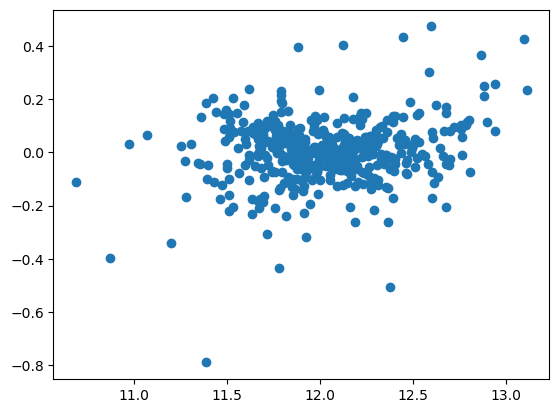

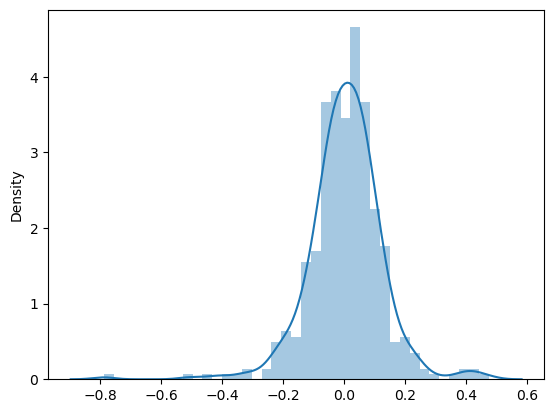

In [77]:
# Cheecking the residual vs predicted plots:
res=y_test-y_pred_test
plt.scatter(y_pred_test,res)
plt.show()
#Checking the distribution of residuals:
sns.distplot(res)
plt.show()

### As is evident from the residual graphs that the residual vs predicted plot is well scattered without any visible patterns aand also the residual distribution plot is normally distributed about zero, ensuring us that the Lasso Model is also a good choice for our dataset. However it should be noted that Lasso yields a higher test score on the testing data.

In [78]:
#checking the significant lasso Coeficients:
coefs=np.array(lasso.coef_)
significant_coefs=coefs[coefs!=0]

features_list=list(zip(features[np.array(lasso.coef_)!=0],significant_coefs))
len(features_list)



72

### Note that the Lasso Model has shrinked many coefficients to zero and finally only 69 features are chosen out of 266 features.

In [79]:
# Creating a dataframe of all the features along with their coefficients:
feature_df=pd.DataFrame(features_list,index=list(range(len(features_list))),columns=['feature_name','coef'])

# Sorting the dataframe on the basis of value of coefficients:
feature_df=feature_df.sort_values(by=['coef'],ascending=False)
feature_df.reset_index(drop=True,inplace=True)

#Finding the top positive coefficient features and negative co-efficient features:
top_positive_features=list(feature_df[feature_df['coef']>0]['feature_name'].head(10))
top_negative_features=list(feature_df[feature_df['coef']<0]['feature_name'].tail(10))
print('Top_negative_features:',top_negative_features,'\n \nTop_positive_features:',top_positive_features)
feature_df
feature_df,feature_df.head(10),feature_df.tail(10)


Top_negative_features: ['HeatingQC_TA', 'Neighborhood_IDOTRR', 'BsmtQual_Gd', 'Neighborhood_Edwards', 'KitchenQual_Fa', 'BsmtQual_TA', 'KitchenQual_TA', 'MSSubClass_2-STORY PUD - 1946 & NEWER', 'Condition2_PosN', 'PropertyAge'] 
 
Top_positive_features: ['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'LotArea', 'GarageArea', 'BsmtFinSF1', 'Neighborhood_Crawfor', 'BsmtExposure_Gd', 'Fireplaces']


(                             feature_name      coef
 0                               GrLivArea  1.023874
 1                             OverallQual  0.449969
 2                             OverallCond  0.337628
 3                             TotalBsmtSF  0.266958
 4                                 LotArea  0.214712
 ..                                    ...       ...
 67                            BsmtQual_TA -0.040204
 68                         KitchenQual_TA -0.040848
 69  MSSubClass_2-STORY PUD - 1946 & NEWER -0.057673
 70                        Condition2_PosN -0.110573
 71                            PropertyAge -0.181597
 
 [72 rows x 2 columns],
            feature_name      coef
 0             GrLivArea  1.023874
 1           OverallQual  0.449969
 2           OverallCond  0.337628
 3           TotalBsmtSF  0.266958
 4               LotArea  0.214712
 5            GarageArea  0.196910
 6            BsmtFinSF1  0.102284
 7  Neighborhood_Crawfor  0.090034
 8       BsmtExposure_G

### Lasso Model Summary:
- The following variables impact the target variable positively keeping rest of the variables constant:<br>
       - `'GrLivArea'`: Above grade (ground) living area square feet,increases price by 1.02 per unit rise of area.<br>
       - `'TotalBsmtSF'`: Total square feet of basement area,increases price by 0.266 per unit<br>
       - `'LotArea'`: Lot size in square feet,increases price by 0.21 per unit area <br>
       - `'OverallCond'`: The overall condition rating of the house,increases price by 0.27 per unit <br>
       - `'OverallQual'`: The overall material and finish rating of the house,increases price by 0.45 per unit <br>
       - `'BsmtFinSF1'`: Type 1 finished square feet of the sale Property.,increases price by 0.10 unit area <br>
       - `'GarageArea'`: Size of garage in square feet,increases price by 0.197 per unit area<br>
       - `'Neighborhood_Crawfor'`: Crawford Neighbourhood,increases price by 0.09 unit<br>
       - `'BsmtExposure_Gd'`: Good Exposure of walkout or garden level walls,increases price by 0.08 unit<br>
       - `'Fireplaces'`: Number of fireplaces,increases price by 0.077 per unit<br><br>
- The following variables impact the target variable negatively keeping rest of the variables constant:<br>
       - `'Condition2_PosN'`: Near positive off-site feature--park, greenbelt, etc.,decreases property price by 0.11 units<br>
       - `'Neighborhood_Edwards'`: Edwards Neighbourhood, decreases property price by 0.036 units<br>
       - `'PropertyAge'`: Age of Property,decreases property price by 0.182 units per year<br>
       - `'HeatingQC_TA'`: Average heating quality,decreases property price by 0.029 units<br>
       - `'MSSubClass_2-STORY PUD - 1946 & NEWER'`: 2-STORY PUD - 1946 & NEWER dwelling,decreases property price by 0.057 units<br>
       - `'Neighborhood_IDOTRR'`:Iowa DOT and Rail Road neighbourhood, decreases property price by 0.030 units<br>
       - `'KitchenQual_TA'`: Simply typical Kitchen Quality,decreases property price by 0.04 units<br>
       - `'KitchenQual_Fa'`: SImply fair Kitchen Quality,decreases property price by 0.037 units<br>
       - `'BsmtQual_TA'`: Typical Basement Quality,decreases property price by 0.04 units<br>
       - `'BsmtQual_Gd '`: Simply Good Basement Quality,decreases property price by 0.030 units<br>

 

## Conclusion:
- Choosing the lasso model as the final model as it gives better accuracy and a simpler model with only 69 significant features.

## Subjective Question 1:


In [80]:
# Applying Ridge Regression with alpha=2*best_alpha:
ridge=Ridge(alpha=2*best_alpha)
# Fitting on the train data:
ridge_reg=ridge.fit(X_train,y_train)

# Predicting on the train and test data to check the scores:
y_pred_train=ridge_reg.predict(X_train)
y_pred_test=ridge_reg.predict(X_test)

# Trian and test score:
train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred_test)

print('train_score:',train_score,' test_score:',test_score)
mse=mean_squared_error(y_test,y_pred_test)
print('root mean squared error:',np.sqrt(mse))

train_score: 0.9414943103333838  test_score: 0.9061152319819498
root mean squared error: 0.12603450054937793


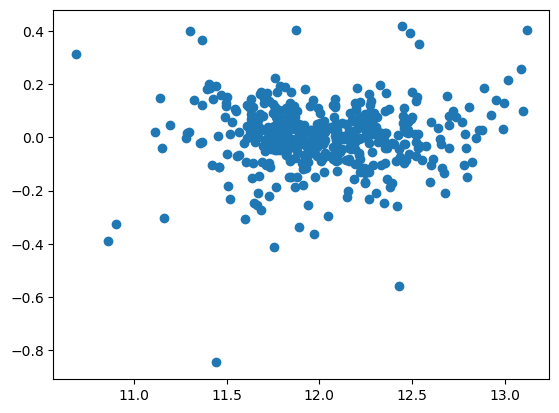

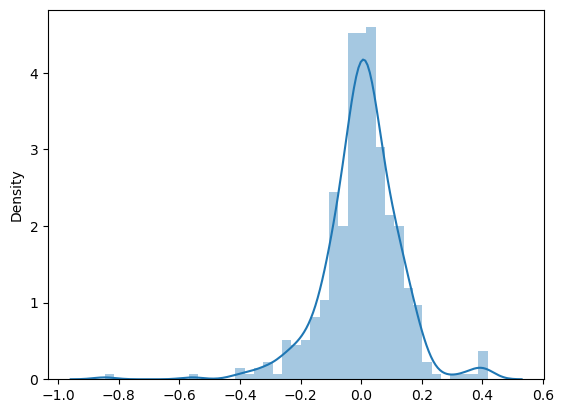

In [81]:
# Checking the residual plots and evaluating the worthiness of the fit:
res=(y_test-y_pred_test)
plt.scatter(y_pred_test,res)
plt.show()
sns.distplot(res)
plt.show()

In [82]:
# Creating a dataframe of all the features along with their coefficients:
coefs=np.array(ridge.coef_)
features_list=list(zip(features,coefs))
feature_df=pd.DataFrame(features_list,index=list(range(len(features_list))),columns=['feature_name','coef'])
# Sorting the dataframe on the basis of value of coefficients:
feature_df=feature_df.sort_values(by=['coef'],ascending=False)
feature_df.reset_index(drop=True,inplace=True)

#Finding the top positive coefficient features and negative co-efficient features:
top_positive_features=list(feature_df[feature_df['coef']>0]['feature_name'].head(10))
top_negative_features=list(feature_df[feature_df['coef']<0]['feature_name'].tail(10))
print('Top_negative_features:',top_negative_features,'\n \nTop_positive_features:',top_positive_features)
feature_df.head(10),feature_df.tail(10),feature_df

Top_negative_features: ['GarageQual_Fa', 'MSSubClass_1-STORY 1945 & OLDER', 'KitchenQual_TA', 'Exterior1st_BrkComm', 'KitchenQual_Fa', 'Functional_Maj2', 'Neighborhood_MeadowV', 'PropertyAge', 'Heating_Grav', 'Condition2_PosN'] 
 
Top_positive_features: ['GrLivArea', 'TotalBsmtSF', 'OverallCond', 'OverallQual', 'LotArea', 'GarageArea', 'MSZoning_FV', 'MSZoning_RL', 'Neighborhood_StoneBr', 'BsmtFinSF1']


(           feature_name      coef
 0             GrLivArea  0.602252
 1           TotalBsmtSF  0.308713
 2           OverallCond  0.305908
 3           OverallQual  0.293095
 4               LotArea  0.275574
 5            GarageArea  0.203538
 6           MSZoning_FV  0.155380
 7           MSZoning_RL  0.128633
 8  Neighborhood_StoneBr  0.122941
 9            BsmtFinSF1  0.116228,
                         feature_name      coef
 253                    GarageQual_Fa -0.084534
 254  MSSubClass_1-STORY 1945 & OLDER -0.085920
 255                   KitchenQual_TA -0.087834
 256              Exterior1st_BrkComm -0.091317
 257                   KitchenQual_Fa -0.096914
 258                  Functional_Maj2 -0.098317
 259             Neighborhood_MeadowV -0.105142
 260                      PropertyAge -0.126220
 261                     Heating_Grav -0.138051
 262                  Condition2_PosN -0.313965,
              feature_name      coef
 0               GrLivArea  0.602252
 1         

In [83]:
# Applying Ridge Regression with alpha=2*best_alpha_lasso:
lasso=Lasso(alpha=2*best_alpha_lasso)
lasso_reg=lasso.fit(X_train,y_train)


# Fitting on the train data:
y_pred_train=lasso_reg.predict(X_train)
y_pred_test=lasso_reg.predict(X_test)




In [84]:
# Checking the train and test score:
train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred_test)
print('train_score:',train_score,' test_score:',test_score)
mse=mean_squared_error(y_test,y_pred_test)
print('root mean squared error:',np.sqrt(mse))

train_score: 0.9033669182328379  test_score: 0.8976364652301956
root mean squared error: 0.13160261322184655


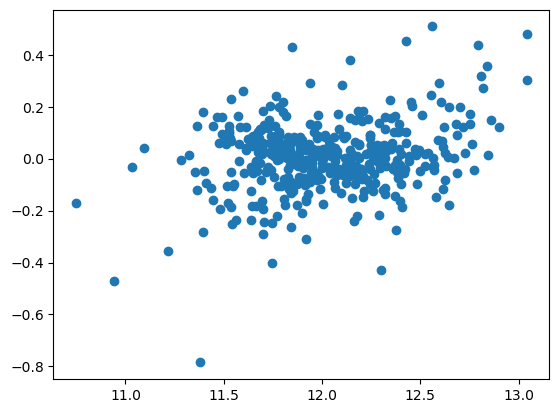

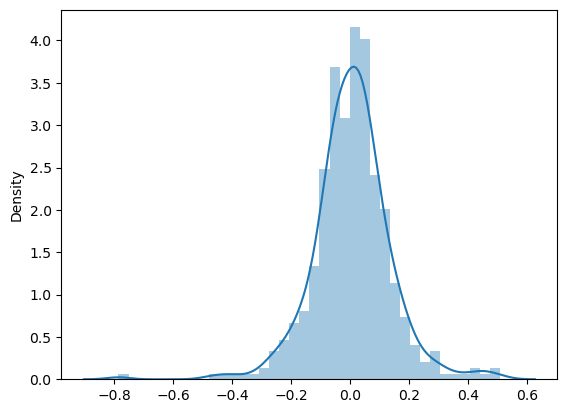

In [85]:
# Cheecking the residual vs predicted plots:
res=y_test-y_pred_test
plt.scatter(y_pred_test,res)
plt.show()
#Checking the distribution of residuals:
sns.distplot(res)
plt.show()

In [86]:
#checking the significant lasso Coeficients:
coefs=np.array(lasso.coef_)
significant_coefs=coefs[coefs!=0]

features_list=list(zip(features[np.array(lasso.coef_)!=0],significant_coefs))
len(features_list)



53

In [87]:
# Creating a dataframe of all the features along with their coefficients:
feature_df=pd.DataFrame(features_list,index=list(range(len(features_list))),columns=['feature_name','coef'])

# Sorting the dataframe on the basis of value of coefficients:
feature_df=feature_df.sort_values(by=['coef'],ascending=False)
feature_df.reset_index(drop=True,inplace=True)

#Finding the top positive coefficient features and negative co-efficient features:
top_positive_features=list(feature_df[feature_df['coef']>0]['feature_name'].head(10))
top_negative_features=list(feature_df[feature_df['coef']<0]['feature_name'].tail(10))
print('Top_negative_features:',top_negative_features,'\n \nTop_positive_features:',top_positive_features)
feature_df
feature_df,feature_df.head(10),feature_df.tail(10)


Top_negative_features: ['BsmtExposure_No', 'MSSubClass_1-STORY 1945 & OLDER', 'MSZoning_RM', 'KitchenQual_TA', 'Neighborhood_Edwards', 'HeatingQC_TA', 'ExterQual_TA', 'BsmtQual_TA', 'MSSubClass_2-STORY PUD - 1946 & NEWER', 'PropertyAge'] 
 
Top_positive_features: ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'GarageArea', 'BsmtFinSF1', 'LotArea', 'CentralAir_Y', 'BsmtExposure_Gd', 'Fireplaces']


(                                  feature_name      coef
 0                                    GrLivArea  0.979677
 1                                  OverallQual  0.503248
 2                                  TotalBsmtSF  0.237879
 3                                  OverallCond  0.223186
 4                                   GarageArea  0.216935
 5                                   BsmtFinSF1  0.102775
 6                                      LotArea  0.088635
 7                                 CentralAir_Y  0.086130
 8                              BsmtExposure_Gd  0.083795
 9                                   Fireplaces  0.080341
 10                        Neighborhood_NridgHt  0.058687
 11                        Neighborhood_Crawfor  0.058296
 12                       SaleCondition_Partial  0.054719
 13                             Condition1_Norm  0.043956
 14                        Neighborhood_Somerst  0.043747
 15                                 MSZoning_RL  0.040899
 16  MSSubClas